# Import Data and Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)
print("set the printing size of the pandas df...")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# import sns and surpress warning
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read in csv 
df = pd.read_csv('../Data/df_group_2024_03_26.csv')
# shape 
print("shape: ", df.shape)

print("also save df as df_save")
df_save = df

print("create herd_cow id")
df['herd_cow'] = df['anm_ida']*1000 + df['hrd_ida']

set the printing size of the pandas df...
shape:  (3210956, 25)
also save df as df_save
create herd_cow id


# Exam and Clean Some Extreme Values

In [2]:
print("return df to saved original data")
df = df_save

return df to saved original data


In [3]:
print("make change to df_clean if necessary")
df2 = df

make change to df_clean if necessary


### DIM

In [4]:
print("exclude visits that have DIM > 1200")

# exclude animals by id
print("shape before: ", df.shape)
df = df[df['dim'] < 1200]
print("shape after: ", df.shape)
df2 = df

exclude visits that have DIM > 1200
shape before:  (3210956, 26)
shape after:  (3210367, 26)


### SCC 

In [5]:
print("set the maximum scc to 5000")
df_scc = df[df['scc'] > 5000]
print("shape: ", df_scc.shape)
ls_scc_id = df_scc['herd_cow'].unique()
# print("inspect cow id with scc>5000: ", len(ls_scc_id), "\n", ls_scc_id)

change = True 
if change: 
    df2["scc"] = np.where(df["scc"] > 5000, 5000, df["scc"])

set the maximum scc to 5000
shape:  (103, 26)


### Milk Temperture

In [6]:
print("exam temperture lower than 20 and replace by mean")
df_temp = df[df['milkng_temp'] < 20]
print("shape: ", df_temp.shape)
print("mostly due to milking error where there is a litte milk to measure")

change = True 
if change: 
    mean_temp = df["milkng_temp"].mean()
    print("mean temperture: ", mean_temp)
    df2["milkng_temp"] = np.where(df["milkng_temp"] < 20, mean_temp, df["milkng_temp"])

exam temperture lower than 20 and replace by mean
shape:  (15672, 26)
mostly due to milking error where there is a litte milk to measure
mean temperture:  38.51430231499461


### Box time and Prep time

In [7]:
print("exam box time and replace > 30 mins by 30 maximum")
df_box = df[df['box_time'] >= 30]
print("shape: ", df_box.shape)
print("all other variables seems normal, they might got stuck inside the box, or the time record was wrong")

change = True 
if change: 
    # change box time
    df2["box_time"] = np.where(df["box_time"] >= 30, 30, df["box_time"])
    # change prep time
    df2["prep_time"] = np.where(df["prep_time"] >= 30, 30, df["prep_time"])

exam box time and replace > 30 mins by 30 maximum
shape:  (197, 26)
all other variables seems normal, they might got stuck inside the box, or the time record was wrong


### Number of visits

In [8]:
print("exam number of visit and limited to 5 maximum")
max_v = 5
df_visit = df[df['no_visit'] > max_v]
print("shape: ", df_visit.shape) 

change = True 
if change: 
    df2["no_visit"] = np.where(df["no_visit"] > max_v, max_v, df["no_visit"])

exam number of visit and limited to 5 maximum
shape:  (0, 26)


### Dealing with milk weight

In [9]:

from collections import Counter
""" 
func: 
    
args: 
    df: panda dataset 
return: 
    df with no animal missed > 5 days milking
"""
def clean_milk_weight(df):
    df_wgt = df[df['mk_wgt']==0]
    print("find and exclude animals that haven't been milked for more than 5 days")
    print("shape of the dataset without milk weight: ", df_wgt.shape) 
    print("shape of df before: ", df.shape)
    ls_idx_wgt = df_wgt['anm_ida'].tolist() 

    ## using count package that return key: value
    count = Counter(ls_idx_wgt)
    ls_idx_del = count.most_common(10)
    print("animal idx and the counts of missed records: ", ls_idx_del)
    ls_idx_del = [i[0] for i in ls_idx_del if i[1] >= 5]

    try: 
        # exclude animals by id
        df = df[~df['anm_ida'].isin(ls_idx_del)]
    except IndexError: 
        pass
    
    print("shape of df after: ", df.shape)
    
    ## dealing with min and max
    min_wgt, max_wgt = 3, 99
    # max
    df["mk_wgt"] = np.where(df["mk_wgt"] > max_wgt, max_wgt, df["mk_wgt"])
    # min
    df["mk_wgt"] = np.where(df["mk_wgt"] < min_wgt, min_wgt, df["mk_wgt"])
    
    return df

"""using func: """
df2 = clean_milk_weight(df2)

find and exclude animals that haven't been milked for more than 5 days
shape of the dataset without milk weight:  (15157, 26)
shape of df before:  (3210367, 26)
animal idx and the counts of missed records:  [(4134, 321), (6317, 218), (4944, 153), (2383, 148), (4694, 144), (1707, 141), (7323, 139), (7361, 123), (7293, 116), (5389, 103)]
shape of df after:  (3202273, 26)


In [10]:
print("inspect extreme milk weight: ")

df_low = df[df['mk_wgt'] < 3]
print("shape: ", df_low.shape)
df_low.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

inspect extreme milk weight: 
shape:  (52624, 26)


,mk_wgt,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no,herd_cow
count,52624.000,52624.000,52624.000,52060.000,52060.000,52060.000,2927.000,52624.000,52624.000,46949.000,52624.000,52624.000,52060.000,52624.000,52624.000,52060.000,52060.000,52060.000,52060.000,52624.000,52624.000,52624.000,52624.000,52624.000
mean,0.833,0.856,167.380,0.109,0.198,1.431,816.797,1.353,1.167,36.579,4018.092,25.454,4.477,102.119,5.084,0.407,0.261,0.253,0.390,1.999,1.945,1.000,2.268,4018117.333
std,0.886,0.351,132.196,0.391,0.873,1.280,1119.586,2.154,1.651,2.629,2244.808,15.243,2.164,1.677,2.232,0.758,0.654,0.639,0.782,0.868,0.862,0.000,1.471,2244808.512
min,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,20.600,0.000,0.000,-5.850,101.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,8.000
25%,0.000,1.000,54.000,0.000,0.000,0.400,66.500,0.000,0.000,35.600,2102.000,13.000,2.850,101.000,3.783,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,2102002.000
50%,0.500,1.000,148.000,0.000,0.005,1.200,224.000,0.000,0.000,37.500,4001.000,24.000,4.667,102.000,5.417,0.000,0.000,0.000,0.000,2.000,2.000,1.000,2.000,4001000.000
75%,1.400,1.000,254.000,0.000,0.122,2.100,1102.000,2.893,3.219,38.514,5908.000,40.000,6.283,102.000,6.733,0.650,0.000,0.000,0.567,3.000,3.000,1.000,3.000,5908018.000
max,2.900,1.000,1180.000,10.817,75.118,12.700,5000.000,14.340,6.578,58.600,8013.000,51.000,30.000,112.000,30.000,21.217,12.233,12.567,13.333,3.000,3.000,1.000,10.000,8013002.000


### Dealing with ft and pt

In [11]:
""" 
func: 
    interpolate with nearby values for ft and pt
args: 
    df: panda 
return: 
    df with no zero ft pt
"""
def clean_ft_pt(df):
    print("interpolate with nearby values")
    # frist make zero to nan, as interpolate method fills nan 
    df['ft_pcnt'].replace(0, np.NaN, inplace=True)
    df['ft_pcnt'] = df.ft_pcnt.interpolate(limit_direction='both')
    df['pt_pcnt'].replace(0, np.NaN, inplace=True)
    df['pt_pcnt'] = df.pt_pcnt.interpolate(limit_direction='both')

    # check if there is still zero
    ls_check = ['ft_pcnt', 'pt_pcnt']
    for i in range(len(ls_check)):
        check_var = ls_check[i] 
        print("check variable for zero: ", check_var)
        df_ab = df[df[check_var]<=0]
        print("count: ", df_ab.shape[0])
        
    ## dealing with min and max for ft
    min_ft, max_ft = 2, 12
    # max
    df["ft_pcnt"] = np.where(df["ft_pcnt"] >  max_ft,  max_ft, df["ft_pcnt"])
    # min
    df["ft_pcnt"] = np.where(df["ft_pcnt"] < min_ft, min_ft, df["ft_pcnt"])
    
    ## dealing with min and max
    min_pt, max_pt = 1, 9
    # max
    df["pt_pcnt"] = np.where(df["pt_pcnt"] >  max_pt,  max_pt, df["pt_pcnt"])
    # min
    df["pt_pcnt"] = np.where(df["pt_pcnt"] < min_pt, min_pt, df["pt_pcnt"])
    
    return df 

"""using func: """
df2 = clean_ft_pt(df2)

interpolate with nearby values
check variable for zero:  ft_pcnt
count:  0
check variable for zero:  pt_pcnt
count:  0


In [12]:
print("inspect extreme values from fat%")
min_ft, max_ft = 2, 12
df_ft_less = df[(df['ft_pcnt'] < min_ft) & (df['milkng_code'] == 0)]
print("df_ft_less: ", df_ft_less.shape)
# df_ft_less.describe()
df_ft_more = df[(df['ft_pcnt'] > max_ft) & (df['milkng_code'] == 0)]
print("df_ft_more: ", df_ft_more.shape)
# df_ft_more.describe()

inspect extreme values from fat%
df_ft_less:  (63581, 26)
df_ft_more:  (35, 26)


In [13]:
print("inspect extreme values from protein%")
min_pt, max_pt = 1, 9
df_pt_less = df[(df['pt_pcnt'] < min_pt) & (df['milkng_code'] == 0)]
print("df_pt_less: ", df_pt_less.shape)

df_pt_more = df[(df['pt_pcnt'] > max_pt) & (df['milkng_code'] == 0)]
print("df_pt_more: ", df_pt_more.shape)
# df_pt_less.describe()
# df_pt_more.describe()

inspect extreme values from protein%
df_pt_less:  (32507, 26)
df_pt_more:  (0, 26)


In [14]:
print("output df2, which is cleaned and can be used for RL project")
df2.to_csv("Data/df_cleaned_normalrange_2024_08_06.csv")

output df2, which is cleaned and can be used for RL project


### Final check the quantiles

In [15]:
""" 
func: 
    check the quantiles 
args: 
    df: panda dataset 
    check_column: list[str] name of column to plot
return: 
    box plot for each variable
"""
def plot_box(df, check_column): 

    # create the figure and two subplots
    fig, axes = plt.subplots(ncols=len(check_column), figsize=(25, 20))

    # create the boxplot with Seaborn
    for column, axis in zip(check_column, axes):
        #print("axis: ", axis)
        #print(column)
        # using sns
        sns.boxplot(data=df[column].tolist(), ax=axis, color="indigo") 
        # set name
        axis.set_title(column)
        #axis.set(xticklabels=[], xticks=[], ylabel=column)

    # show the plot
    plt.tight_layout()
    plt.show()

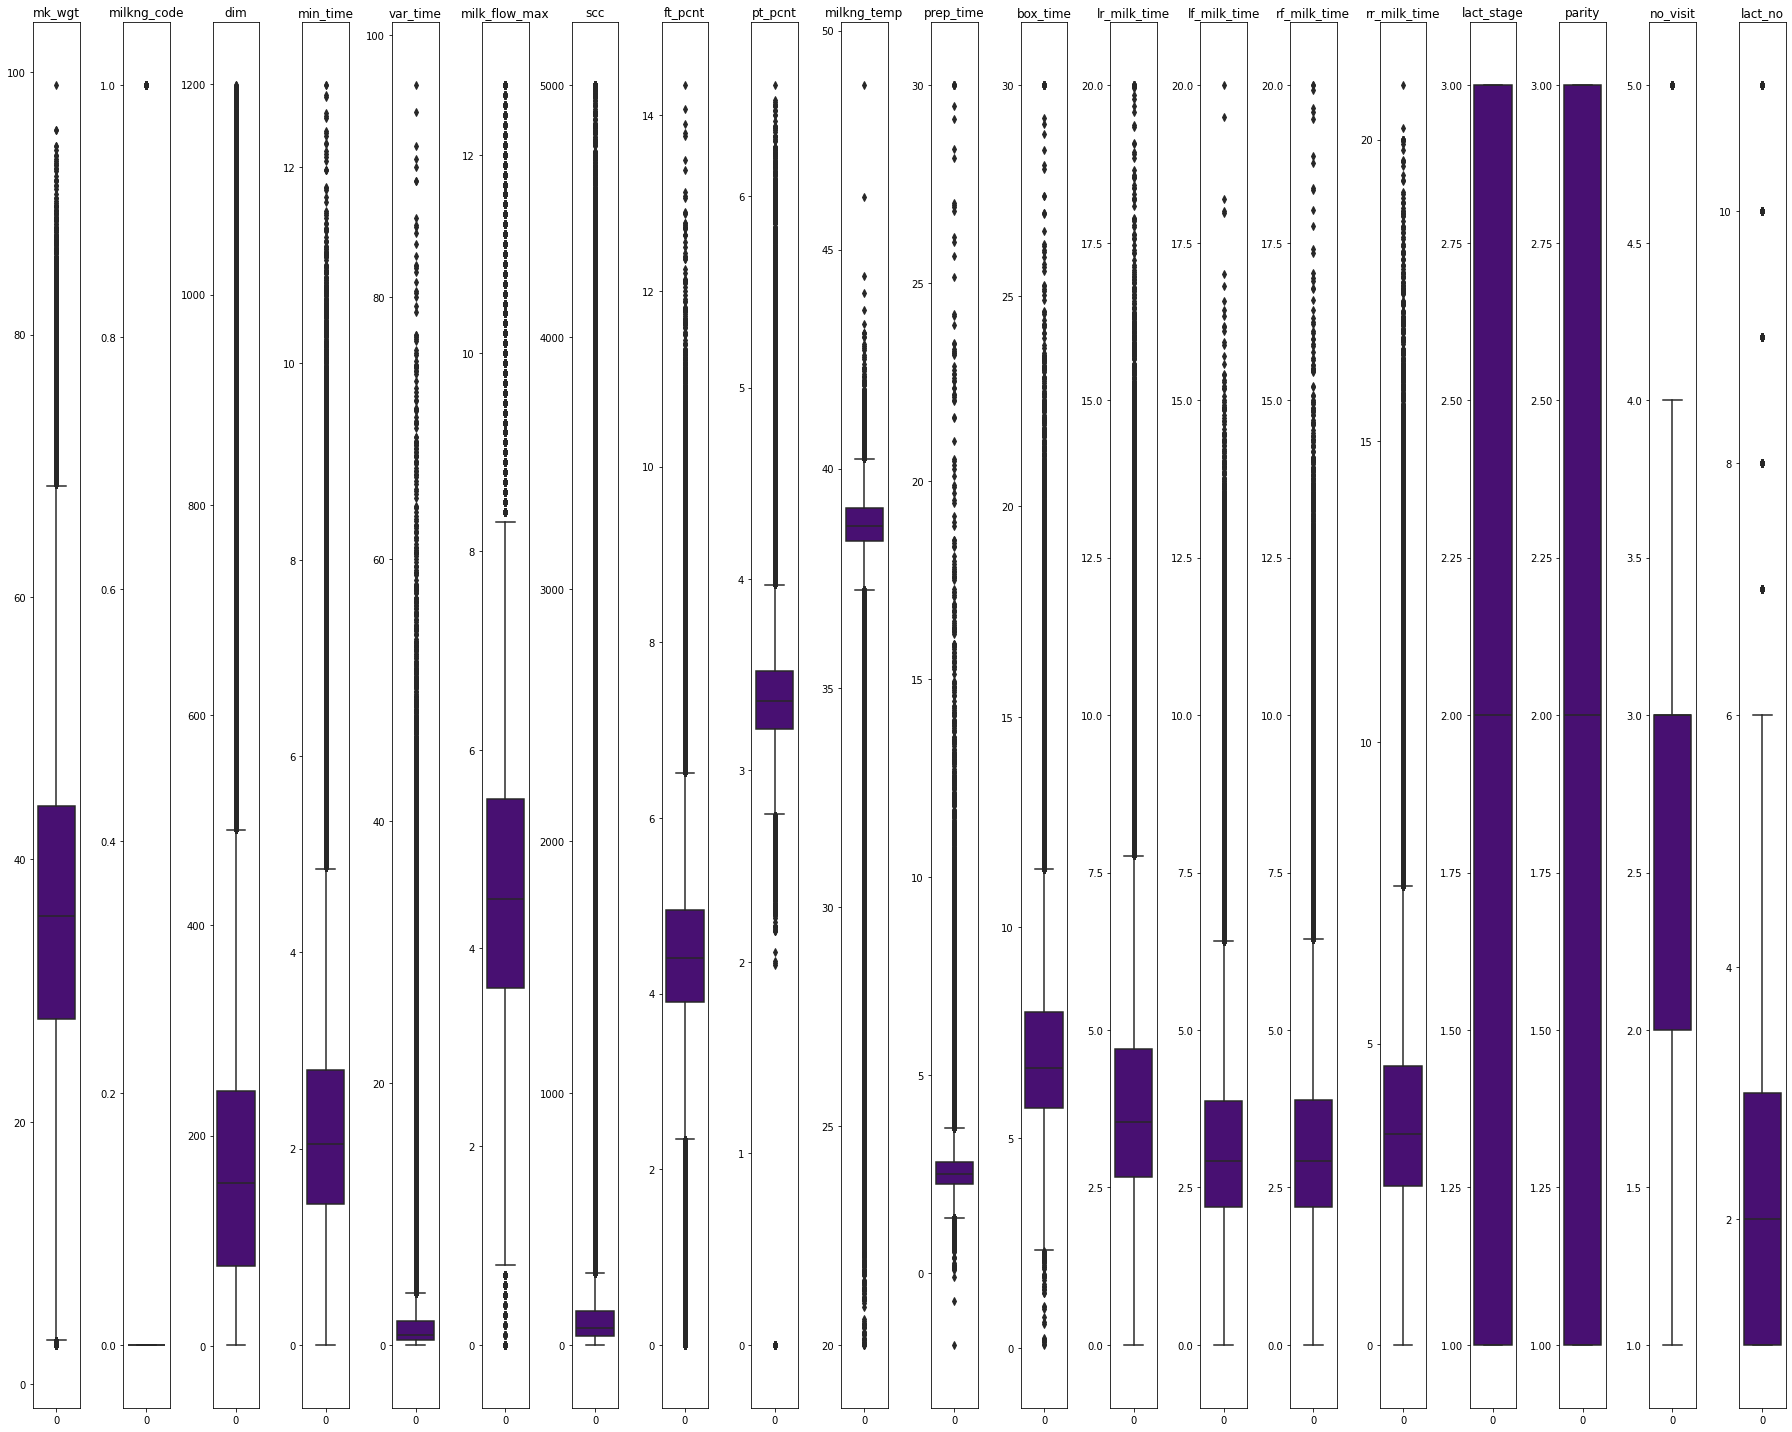

In [33]:
# store the list of columns
check_column = ['mk_wgt',  'milkng_code', 'dim', 'min_time', 'var_time', 'milk_flow_max', 'scc', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time', 'no_visit', 'lact_no']
plot_box(df2, check_column)

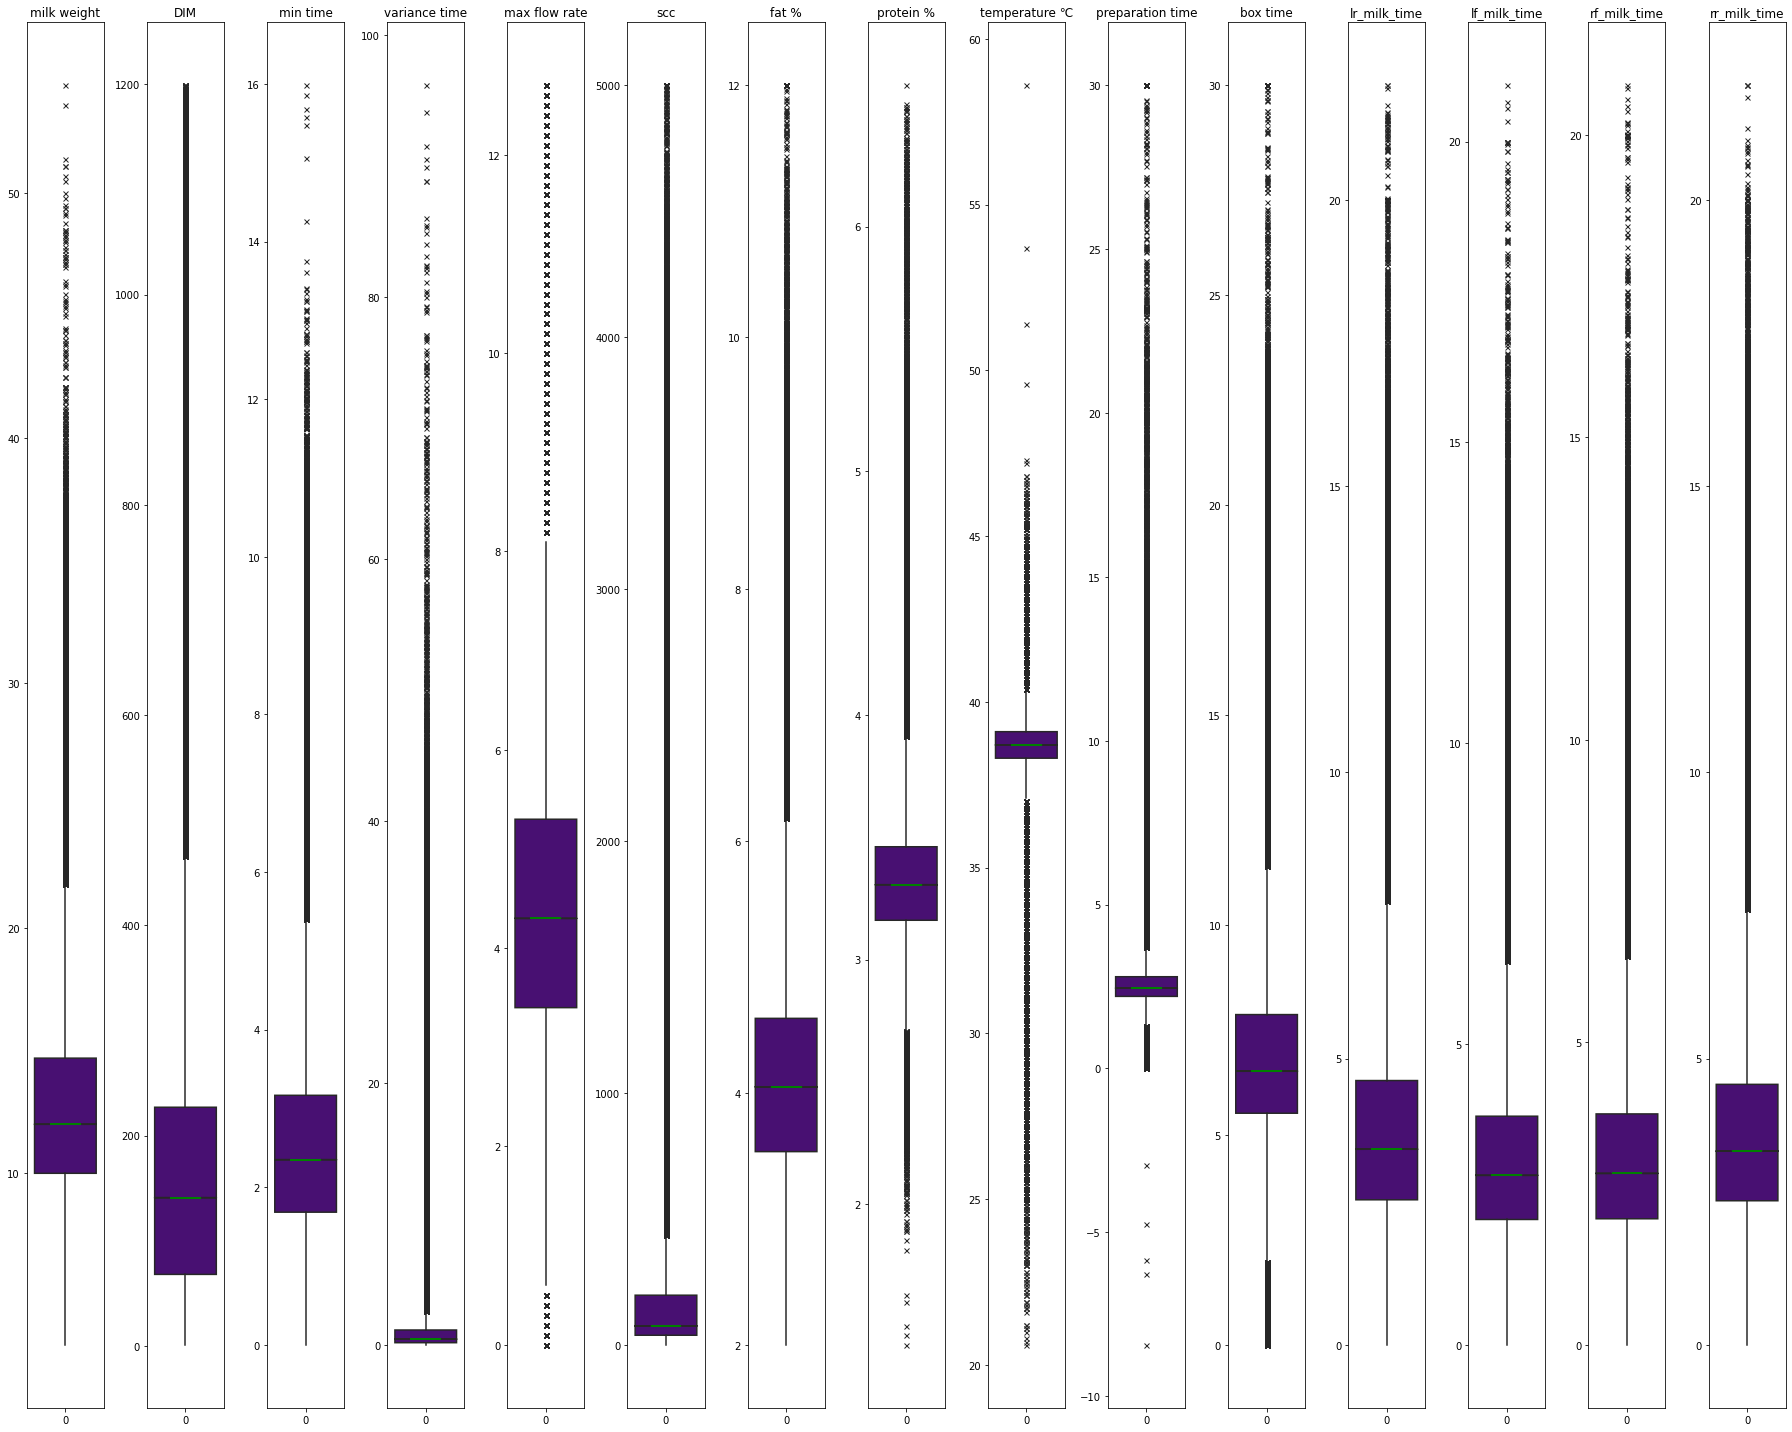

In [16]:
# Store the list of columns
columns_to_plot = [ 'mk_wgt', 'dim', 'min_time', 'var_time', 'milk_flow_max', 'scc', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']
better_name = ['milk weight', 'DIM', 'min time', 'variance time', 'max flow rate', 'scc', 'fat %', 'protein %', 'temperature ℃', 'preparation time', 'box time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']
# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot), figsize=(25, 20))

# Create the boxplot with Seaborn
for idx in range(len(axes)):
        sns.boxplot(data=df2[columns_to_plot[idx]], ax=axes[idx], color="indigo", 
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            medianprops={"color": "g", "linewidth": 2}) 
        #print(columns_to_plot[idx])
        axes[idx].set_title(better_name[idx])
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

In [133]:
print("write to csv: ")
df2.to_csv("../Data/clean_visit_52herds.csv")

write to csv: 


# Inspect Milking Code

### Run test

In [26]:
"""
func: 
    conduct run test 
args: 
    sequence: list of 0, 1
"""
import numpy as np
from scipy.stats import norm
def runs_test(sequence):
    # Rename
    binary_sequence = sequence
    
    # Count the number of runs
    runs = np.sum(np.diff(binary_sequence) != 0) + 1
    
    # Calculate the expected number of runs
    n1 = np.sum(binary_sequence)  # Number of 1s
    n2 = len(binary_sequence) - n1  # Number of 0s
    expected_runs = (2 * n1 * n2) / (n1 + n2) + 1
    
    # Calculate the variance of the number of runs
    variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2) ** 2 * (n1 + n2 - 1))
    
    # Compute the Z-value
    z_value = (runs - expected_runs) / np.sqrt(variance_runs)
    
    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z_value)))
    
    return z_value, p_value

In [29]:
print("frist create herd_robot id")
df2['herd_robot'] = df2['hrd_ida'] * 10000 + df2['stall_no']


# list of robot id 
ls_robot = df2['herd_robot'].unique().tolist()
#print("list of robot ids: ", ls_robot)

# init count of random and nonrandom 
count_random, nonrandom = 0, 0

# loop and inspect some milking code from robot
for i in range(len(ls_robot)):
#for i in range(2):
    # get robot
    df_robot = df2[df2['herd_robot'] == ls_robot[i]]
    # get milking code
    sequence = df_robot['milkng_code']
    #print("sequence: ", sequence)
    """call func"""
    z_value, p_value = runs_test(sequence)
    #print("z_value, p_value: ", z_value, p_value)
    if p_value < 0.05: 
        nonrandom += 1 
    else: 
        count_random += 1
        
print("count_random, nonrandom: ", count_random, nonrandom)

frist create herd_robot id
count_random, nonrandom:  8 126


### Inspect Milking Code 1 and 0

In [95]:
"""
func: 
    test each variable from code 0 and 1 
args:
    df: panda dataset
    check_column: list[str] name of the column
"""
# import the library
#import scipy.stats as stats
import statsmodels.stats.weightstats as stats
def test_scc_code(df, check_column):

    ## first test column except for scc, as it has nan value
    check_column.remove('scc')
    # obtain df by milking code
    df_code0 = df[df["milkng_code"]==0]
    df_code1 = df[df["milkng_code"]==1]
    # use the min length 
    length = df_code1.shape[0]
    # loop check_column
    for name in range(len(check_column)):
        name = check_column[name]
        print("name: ", name)
        # print("test: ", df_code0[name].tolist())
        t_value, p_value, df = stats.ttest_ind(df_code0[name].tolist()[:length], df_code1[name].tolist()[:length])
        print("t_value, p_value: ", t_value, p_value)
    
    ## test scc, use value without nan
    # get a df without nan 
    df_code0 = df_code0[df_code0['scc'].notna()]
    df_code1 = df_code1[df_code1['scc'].notna()]
    name = "scc"
    print("name: ", name)
    # perform the two sample t-test with equal variances
    t_value, p_value, df = stats.ttest_ind(df_code0[name].tolist()[:length], df_code1[name].tolist()[:length])
    print("t_value, p_value: ", t_value, p_value)


In [44]:
""" 
func: 
    plot the box plot for milking code 0 and 1 
args: 
    df_code0, df_code1: panda dataset
    column: list[string]
return: 
    plots
"""
def plot_code0_code1(df_code0, df_code1, column):
    # create the figure and two subplots
    fig, axes = plt.subplots(ncols=len(column)*2, figsize=(30, 25))

    # create the boxplot with Seaborn
    plot0, plot1 = True, False
    for idx in range(len(axes)):
        #print("plot0, plot1: ", plot0, plot1)
        if plot0:
            name = column[int(idx/2)]
            axis = axes[idx]
            # using sns
            sns.boxplot(data = df_code0[name].tolist(), ax=axis) 
            # set name
            axis.set_title(name)
        if plot1: 
            name = column[int(idx/2)]
            axis = axes[idx]
            # using sns
            sns.boxplot(data = df_code1[name].tolist(), ax=axis) 
            # set name
            axis.set_title(name)        

        # reverse the bool to plot the another code
        plot0, plot1 = not plot0, not plot1


    # show the plot
    plt.tight_layout()
    plt.show()

In [34]:
"""
using func
"""
column1 = ['dim',  'milk_flow_max', 'scc', 'mk_wgt', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'lact_stage', 'lact_no']
column2 = ['no_visit', 'min_time', 'var_time',  'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']

df_code0 = df2[df2['milkng_code']==0]
df_code1 = df2[df2['milkng_code']==1]

# plot_code0_code1(df_code0, df_code1, column1)

In [35]:
"""using func: """
# plot_code0_code1(df_code0, df_code1, column2)

'using func: '

### Inspect if milking code appears from the robots randomly

In [38]:
print("frist create herd_robot id")
df2['herd_robot'] = df2['hrd_ida'] * 10000 + df2['stall_no']

print("print some milking code") 
plot = False
if plot:
    # list of robot id 
    ls_robot = df2['herd_robot'].unique().tolist()
    print("list of robot ids: ", ls_robot)

    # loop and inspect some milking code from robot
    for i in range(90, len(ls_robot)):
        df_robot = df2[df2['herd_robot'] == ls_robot[i]]
        #print(df_robot['milkng_code'])
        #print()
        X = [x for x in range(len(df_robot['milkng_code']))]
        plt.scatter(X, df_robot['milkng_code'])
        plt.show()

frist create herd_robot id
print some milking code


In [39]:
"""
func: 
    count continous value, used by split by p 
args: 
    df_clean: panda 
return: 
    ls_count: list[float]?
"""
def count_continous(df_clean): 
    # assign a subgroup to each set of consecutive rows
    df_clean["subgroup"] = df_clean["milkng_code"].ne(df_clean["milkng_code"].shift()).cumsum()

    # take the max length of any subgroup that belongs to "name"
    def get_max_consecutive(name):
        return df_clean.groupby(["milkng_code", "subgroup"]).apply(len)[name].max()

    # init a list for return 
    ls_count = [] 
    
    for name in df_clean.milkng_code.unique():
        ls_count.append(get_max_consecutive(name))
        
    return ls_count

""" 
ffunc: 
    split the robots by testing their randomness 
args: 
    df_clean: panda
    ls_robot: list[float] robot id
return: 
    ls_random, ls_cluster: list[int] robot id
"""
def split_by_p(df_clean, ls_robot, P=0.01):
    
    # init for result 
    ls_random, ls_cluster = [], []
    print("we find that some robot have code randomly shows up, but some are not")
    for idx in ls_robot:
        #print("test the randomness by maximum appearness: ")
        df_robot = df_clean[df_clean['herd_robot'] == idx]
        ls_code = df_robot['milkng_code']
        #print("shape: ", ls_code.shape) 

        # p is the prob of 1, also the mean of the list
        p = ls_code.mean()
        #print("p: ", p)
        
        """using func"""
        ls_count = count_continous(df_robot)
        #print("ls_count: ", ls_count)

        max_seq = min(ls_count)
        # prop of the occurence of this max sequence 
        prob = (p**(max_seq)) * len(ls_code)
        #print("prob: ", prob)
        # append to result
        if prob < P: 
            ls_cluster.append(idx) 
        else: 
            ls_random.append(idx)
        
    print("length of two groups: ", len(ls_random), len(ls_cluster))
    return ls_random, ls_cluster

In [40]:
# list of robot id 
ls_robot = df2['herd_robot'].unique().tolist()
ls_random, ls_cluster = split_by_p(df2, ls_robot, P=0.01)

we find that some robot have code randomly shows up, but some are not
length of two groups:  29 103


In [45]:
print("inspect this two groups of robots: ")
df_random = df2[df2['herd_robot'].isin(ls_random)]
# df_random.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

inspect this two groups of robots: 


In [46]:
df_cluster = df2[df2['herd_robot'].isin(ls_cluster)]
# df_cluster.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

# Closely check the cows tha have many code 1 with raw data
# ------
# -----
# ---- 
# --- 
# -- 
# - 

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)
print("set the printing size of the pandas df...")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# import sns and surpress warning
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("read in raw data and check")
dfraw = pd.read_csv("../Data/51herds_raw.csv")

set the printing size of the pandas df...
read in raw data and check


In [32]:
"""using func: """
# dfraw = replace_id_create_id(dfraw)
# print out to csv 
dfraw.to_csv("../Data/51herds_raw.csv")

In [33]:
print("pick a robot, count the number of code 1 and inspect raw data")
plot = False
if plot: 
    df3 = dfraw
    print("pick a robot")
    df_robot = df3[df3['herd_robot'] == ls_robot[4]]
    # get the cow id that has code 1
    ls_code_cow = df_robot[df_robot['milkng_code'] == 1]['herd_cow'].tolist()

    # use a dict to store cow_id[count]
    cow_id_count = {}

    # check the len of chunk of each cow 
    count = 1 
    for i in range(len(ls_code_cow)-1): 
        if ls_code_cow[i] == ls_code_cow[i+1]: 
            count += 1 
        else: 
            #print("cow id: ", ls_code_cow[i], "count :", count)
            cow_id_count[ls_code_cow[i]] = count
            count = 1

    # sort id by count 
    print(dict(sorted(cow_id_count.items(), key=lambda item: item[1])))

    cow_id = 6681048
    df_cow = df3[df3['herd_cow'] == cow_id]
    print("shape of this cow: ", df_cow.shape)
    df_cow_code1 = df_cow[df_cow['milkng_code'] == 1]
    print("shape of cow code1: ", df_cow_code1.shape)
    df_cow_code1
    df_cow
    
    print("for the code 1, how much is it due to machine, and cow?")
    print("it is already many hours later, why still not milking?")
    print("regress on the code, and see the effects of machine and cow")
    print("inspect the ratio of code 1 for each machine")

pick a robot, count the number of code 1 and inspect raw data


In [34]:
print("code to inspect number of animals and stalls from each herd")

print_ = False 
if print_: 
    df3 = dfraw
    # find list
    ls_hrd = df3['hrd_ida'].unique().tolist() 
    # loop list 
    for idx in ls_hrd: 
        # find herd 
        df_herd = df3[df3['hrd_ida'] == idx]
        # print
        print("animals: ", df_herd['anm_ida'].nunique(), "| stalls: ", df_herd['stall_no'].nunique())
        
    print('check if code 0 also have zero milking')
    df3_code0 = df3[df3['milkng_code'] == 0] 
    df3_code0.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

code to inspect number of animals and stalls from each herd


### Compute the occurence of code 1 for cow and robot and plot

### Cow

In [35]:

# init
occ_cow = [] 
# get cow id 
cow_id = sorted(dfraw['herd_cow'].unique().tolist()) 
# loop cow id 
for i in range(len(cow_id)): 
    # get cow df 
    dfcow = dfraw[dfraw['herd_cow'] == cow_id[i]]
    # get ratio of 1 
    ratio = sum(dfcow['milkng_code'])/len(dfcow['milkng_code'])
    # append
    occ_cow.append(ratio)

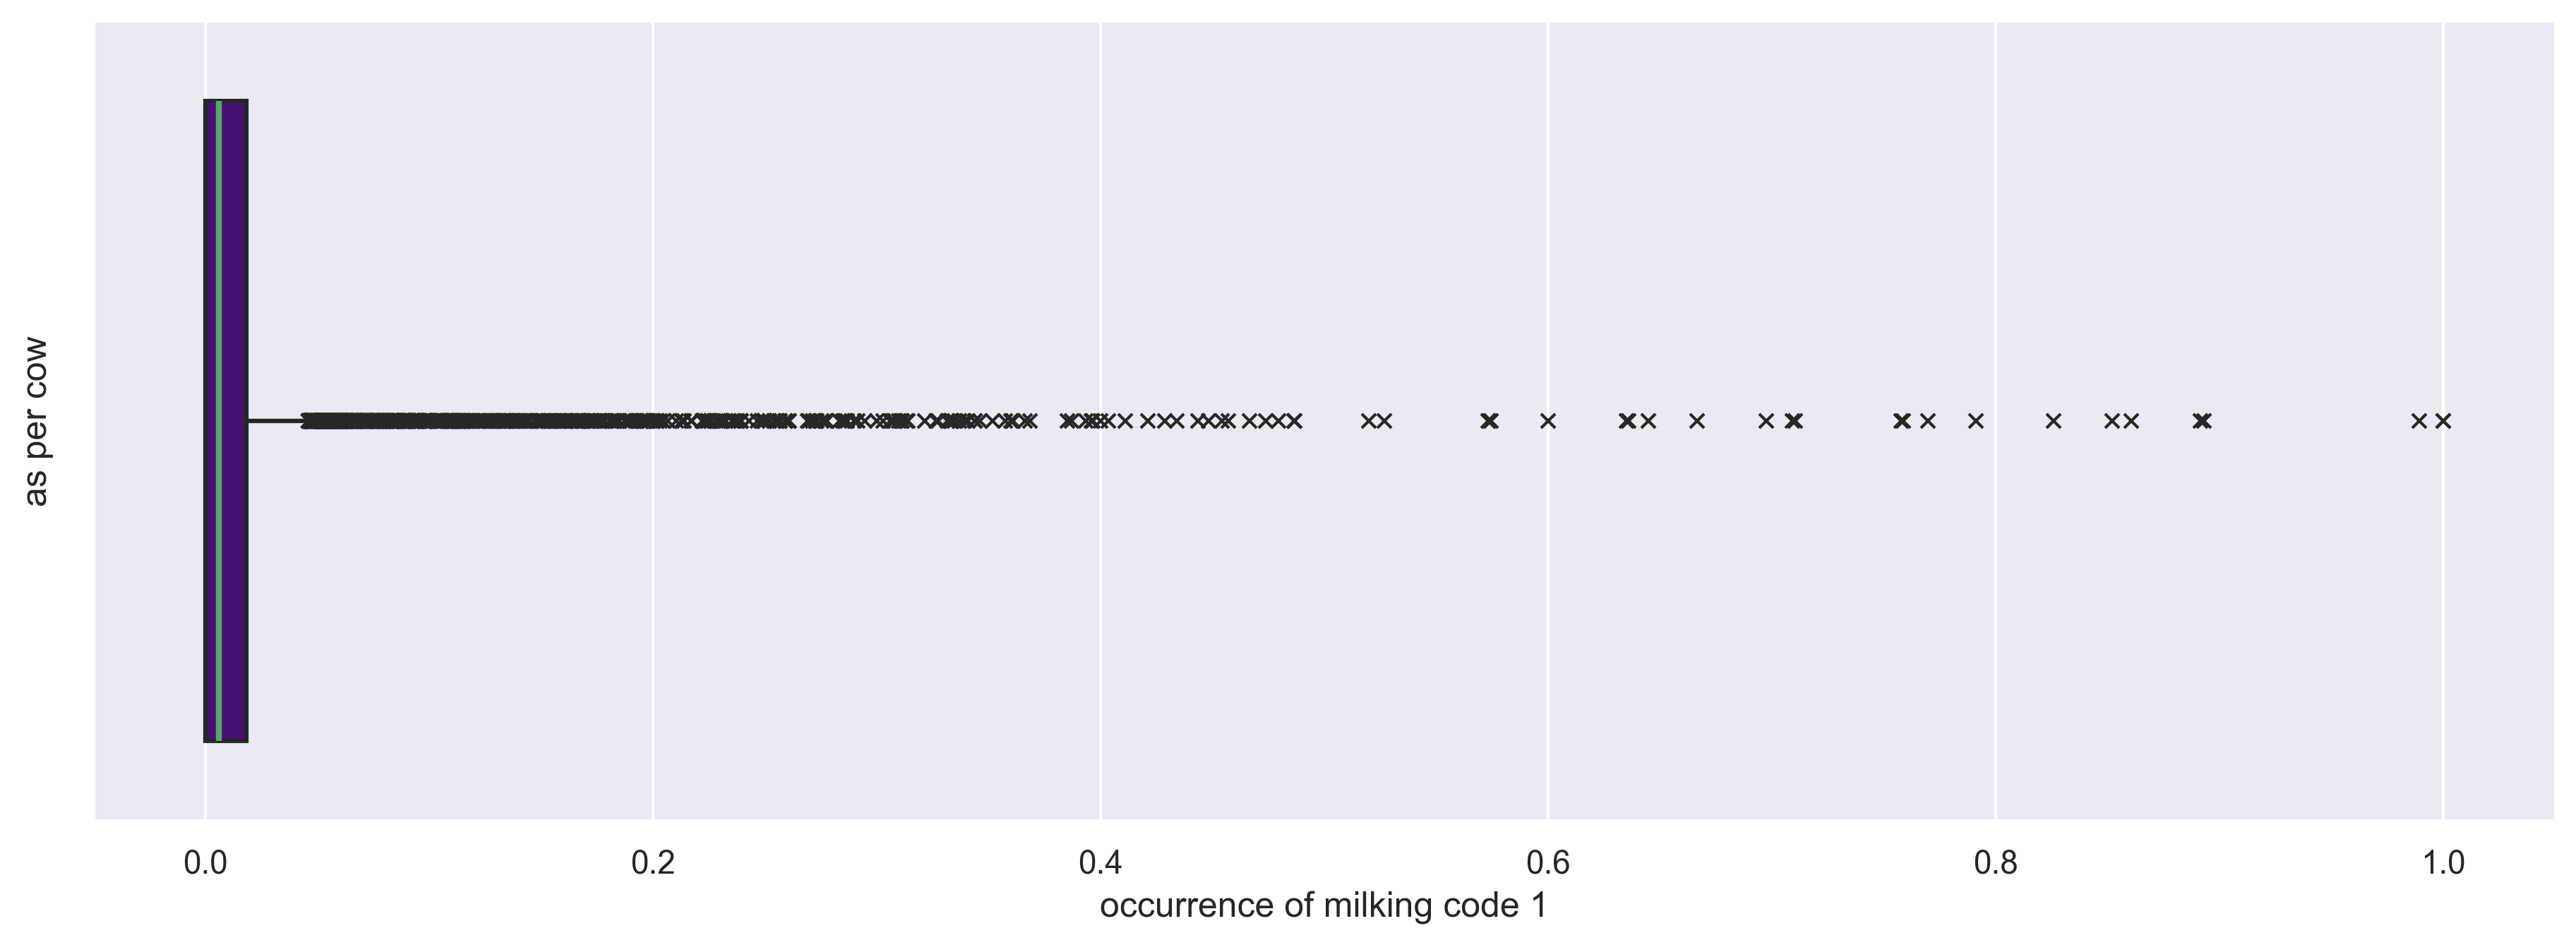

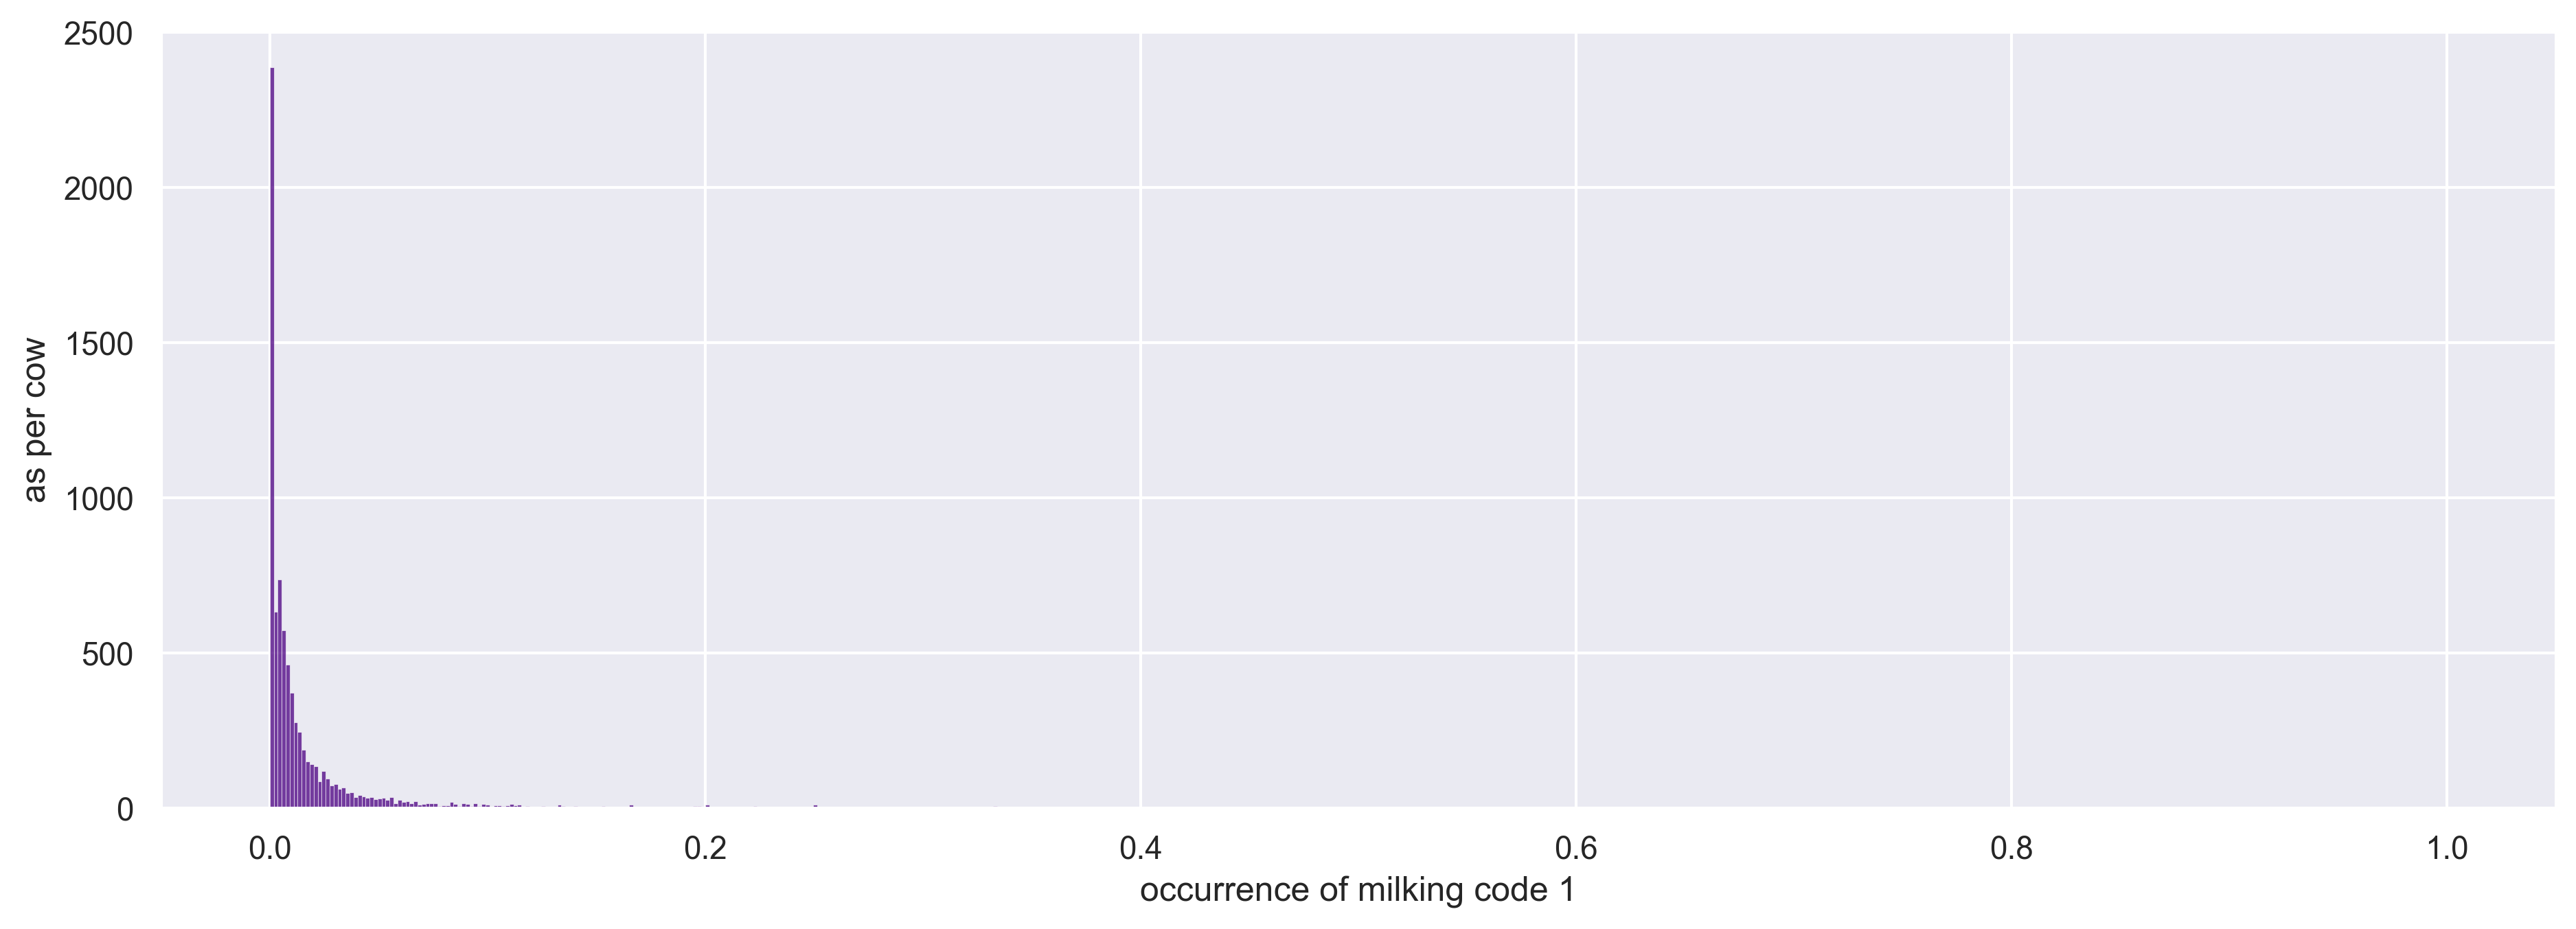

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme and figure size
sns.set_theme(rc={'figure.figsize': (15, 5)})

# Set DPI for the figure
plt.figure(dpi=300)

# Boxplot
sns.boxplot(occ_cow, 
            notch=False, showcaps=False,
            flierprops={"marker": "x"},
            medianprops={"color": "g", "linewidth": 2},
            color="indigo").set(xlabel="occurrence of milking code 1", ylabel="as per cow")

# Display the boxplot
plt.show()

# Set DPI for the histogram figure
plt.figure(dpi=300)

# Histogram
sns.histplot(occ_cow, color="indigo").set(xlabel="occurrence of milking code 1", ylabel="as per cow")

# Display the histogram
plt.show()


In [37]:
print("find and inspect cows has ratio > x, and plot")
x = 0.5
cow_id_x= [] 
# loop occ_cow 
for i in range(len(occ_cow)): 
    # base on occ_cow have the same order with cow_id
    if occ_cow[i] > x: 
        cow_id_x.append(cow_id[i])

print("number of cow exceeds this threshold: ", len(cow_id_x))

find and inspect cows has ratio > x, and plot
number of cow exceeds this threshold:  25


In [38]:
""" 
func: 
    check the quantiles 
args: 
    dfx, dfx_not: panda dataset 
    check_column: list[str] name of column to plot
return: 
    box plot for each variable
"""
def plot_box(dfx, dfx_not, check_column): 

    # create the figure and two subplots
    fig, axes = plt.subplots(ncols=len(check_column), figsize=(25, 20))

    # create the boxplot with Seaborn
    for column, axis in zip(check_column, axes):

        # dealing with nan 
        if dfx_not[column].isnull().any(): 
            #print(column, "nan")
            # dropnan 
            ls1 = dfx[column].dropna().tolist()
            # dropnan 
            ls2 = dfx_not[column].dropna().tolist()
            
            # create a temp df for ploting
            ls_ls = [ls1, ls2]

            axis.boxplot(ls_ls)

            # set name
            axis.set_title(column)
            #axis.set(xticklabels=[], xticks=[], ylabel=column)
        else: 
            #print(column)
            # create a temp df for ploting
            ls_ls= [dfx[column].tolist(), dfx_not[column].tolist()]

            axis.boxplot(ls_ls)

            # set name
            axis.set_title(column)
        


    # show the plot
    plt.tight_layout()
    plt.show()
    
# get df by cow id 
dfx = dfraw[dfraw['herd_cow'].isin(cow_id_x)]
dfx_not = dfraw[~dfraw['herd_cow'].isin(cow_id_x)]

column1 = ['dim', 'scc', 'mk_wgt', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'lact_no']
column2 = ['prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'milk_flow_max']

"""using func: """
#plot_box(dfx, dfx_not, column1)
#plot_box(dfx, dfx_not, column2)

'using func: '

In [11]:
dfx.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,Unnamed: 0.1,Unnamed: 0,hrd_ida,anm_ida,lact_no,dim,stall_no,milkng_code,mk_wgt,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,milk_time,prep_time,milk_flow_avg,milk_flow_max,ft_pcnt,pt_pcnt,scc,milkng_temp,herd_cow,herd_robot
count,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,4102.000,3054.000,4102.000,4102.000,4102.000,631.000,3880.000,4102.000,4102.000
mean,1586660.360,1586660.360,22.741,3816.518,1.848,208.155,101.620,0.694,3.686,6.259,1.487,1.442,0.836,1.430,1.942,4.318,2.487,2.087,2.037,1.700,411.786,28.501,3816540.781,101642.926
std,801950.430,801950.430,14.459,2450.563,1.355,161.739,0.647,0.461,4.374,2.391,2.059,2.047,1.582,1.833,2.308,1.765,4.199,1.610,2.174,1.709,787.662,14.987,2450563.279,645.638
min,100016.000,100016.000,0.000,624.000,1.000,1.000,101.000,0.000,0.000,0.150,0.000,0.000,0.000,0.000,0.000,0.150,0.000,0.000,0.000,0.000,1.000,0.000,624002.000,101002.000
25%,1314349.250,1314349.250,7.000,1707.000,1.000,41.000,101.000,0.000,0.300,4.717,0.000,0.000,0.000,0.000,0.000,2.783,1.100,0.700,0.000,0.000,52.000,28.600,1707004.000,101037.000
50%,1446983.500,1446983.500,19.000,3188.000,1.000,227.000,102.000,1.000,1.000,6.450,0.317,0.000,0.000,0.417,0.850,4.000,1.800,1.800,1.039,2.763,89.000,36.400,3188014.000,102004.000
75%,2386217.750,2386217.750,37.000,6880.000,2.000,310.000,102.000,1.000,7.200,7.167,2.583,2.650,0.850,2.500,3.483,5.896,2.700,3.100,3.951,3.353,250.000,38.200,6880038.000,102026.000
max,2886241.000,2886241.000,49.000,7852.000,6.000,722.000,104.000,1.000,17.100,26.433,11.550,9.700,10.467,8.467,11.550,22.517,108.000,9.400,9.155,6.190,5070.000,41.100,7852044.000,104018.000


In [12]:
dfx_not.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,Unnamed: 0.1,Unnamed: 0,hrd_ida,anm_ida,lact_no,dim,stall_no,milkng_code,mk_wgt,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,milk_time,prep_time,milk_flow_avg,milk_flow_max,ft_pcnt,pt_pcnt,scc,milkng_temp,herd_cow,herd_robot
count,3206854.000,3206854.000,3206854.000,3206854.000,3206854.000,3206854.000,3206854.000,3206854.000,3206854.000,3206854.000,3206290.000,3206290.000,3206290.000,3206290.000,3206290.000,3206290.000,3186331.000,3206290.000,3206854.000,3206854.000,950384.000,3201392.000,3206854.000,3206854.000
mean,1605501.570,1605501.570,25.345,3996.672,2.450,157.409,102.168,0.020,12.532,6.932,3.735,3.082,3.081,3.695,4.316,2.616,3.212,4.400,4.005,3.255,273.678,38.526,3996697.289,102192.868
std,927072.232,927072.232,15.702,2303.898,1.500,115.737,1.733,0.139,4.139,2.100,1.875,1.587,1.570,1.868,1.969,0.868,1.305,1.442,1.051,0.527,537.048,2.729,2303897.327,1733.779
min,0.000,0.000,0.000,0.000,1.000,1.000,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-8.433,0.000,0.000,0.000,0.000,1.000,0.000,8.000,101000.000
25%,802339.250,802339.250,12.000,1996.000,1.000,68.000,101.000,0.000,10.000,5.517,2.533,2.083,2.100,2.517,3.000,2.200,2.400,3.400,3.505,3.151,39.000,38.300,1996005.000,101029.000
50%,1605895.500,1605895.500,27.000,3980.000,2.000,141.000,102.000,0.000,12.000,6.517,3.417,2.817,2.833,3.383,3.933,2.450,3.100,4.300,4.039,3.307,76.000,38.700,3980048.000,102011.000
75%,2408543.750,2408543.750,40.000,5986.000,3.000,227.000,103.000,0.000,14.700,7.867,4.617,3.800,3.817,4.550,5.217,2.800,3.900,5.300,4.583,3.462,199.000,39.100,5986044.000,103000.000
max,3210955.000,3210955.000,51.000,8013.000,11.000,1393.000,112.000,1.000,54.400,118.400,22.000,20.933,20.817,22.000,22.000,115.933,276.000,12.700,14.340,6.578,10552.000,58.600,8013002.000,112033.000


### Robot

In [39]:
# init
occ_robot = [] 
# get robot id 
robot_id = sorted(dfraw['herd_robot'].unique().tolist()) 
# loop robot id 
for i in range(len(robot_id)): 
    # get robot df 
    dfrobot = dfraw[dfraw['herd_robot'] == robot_id[i]]
    # get ratio of 1 
    ratio = sum(dfrobot['milkng_code'])/len(dfrobot['milkng_code'])
    # append
    occ_robot.append(ratio)

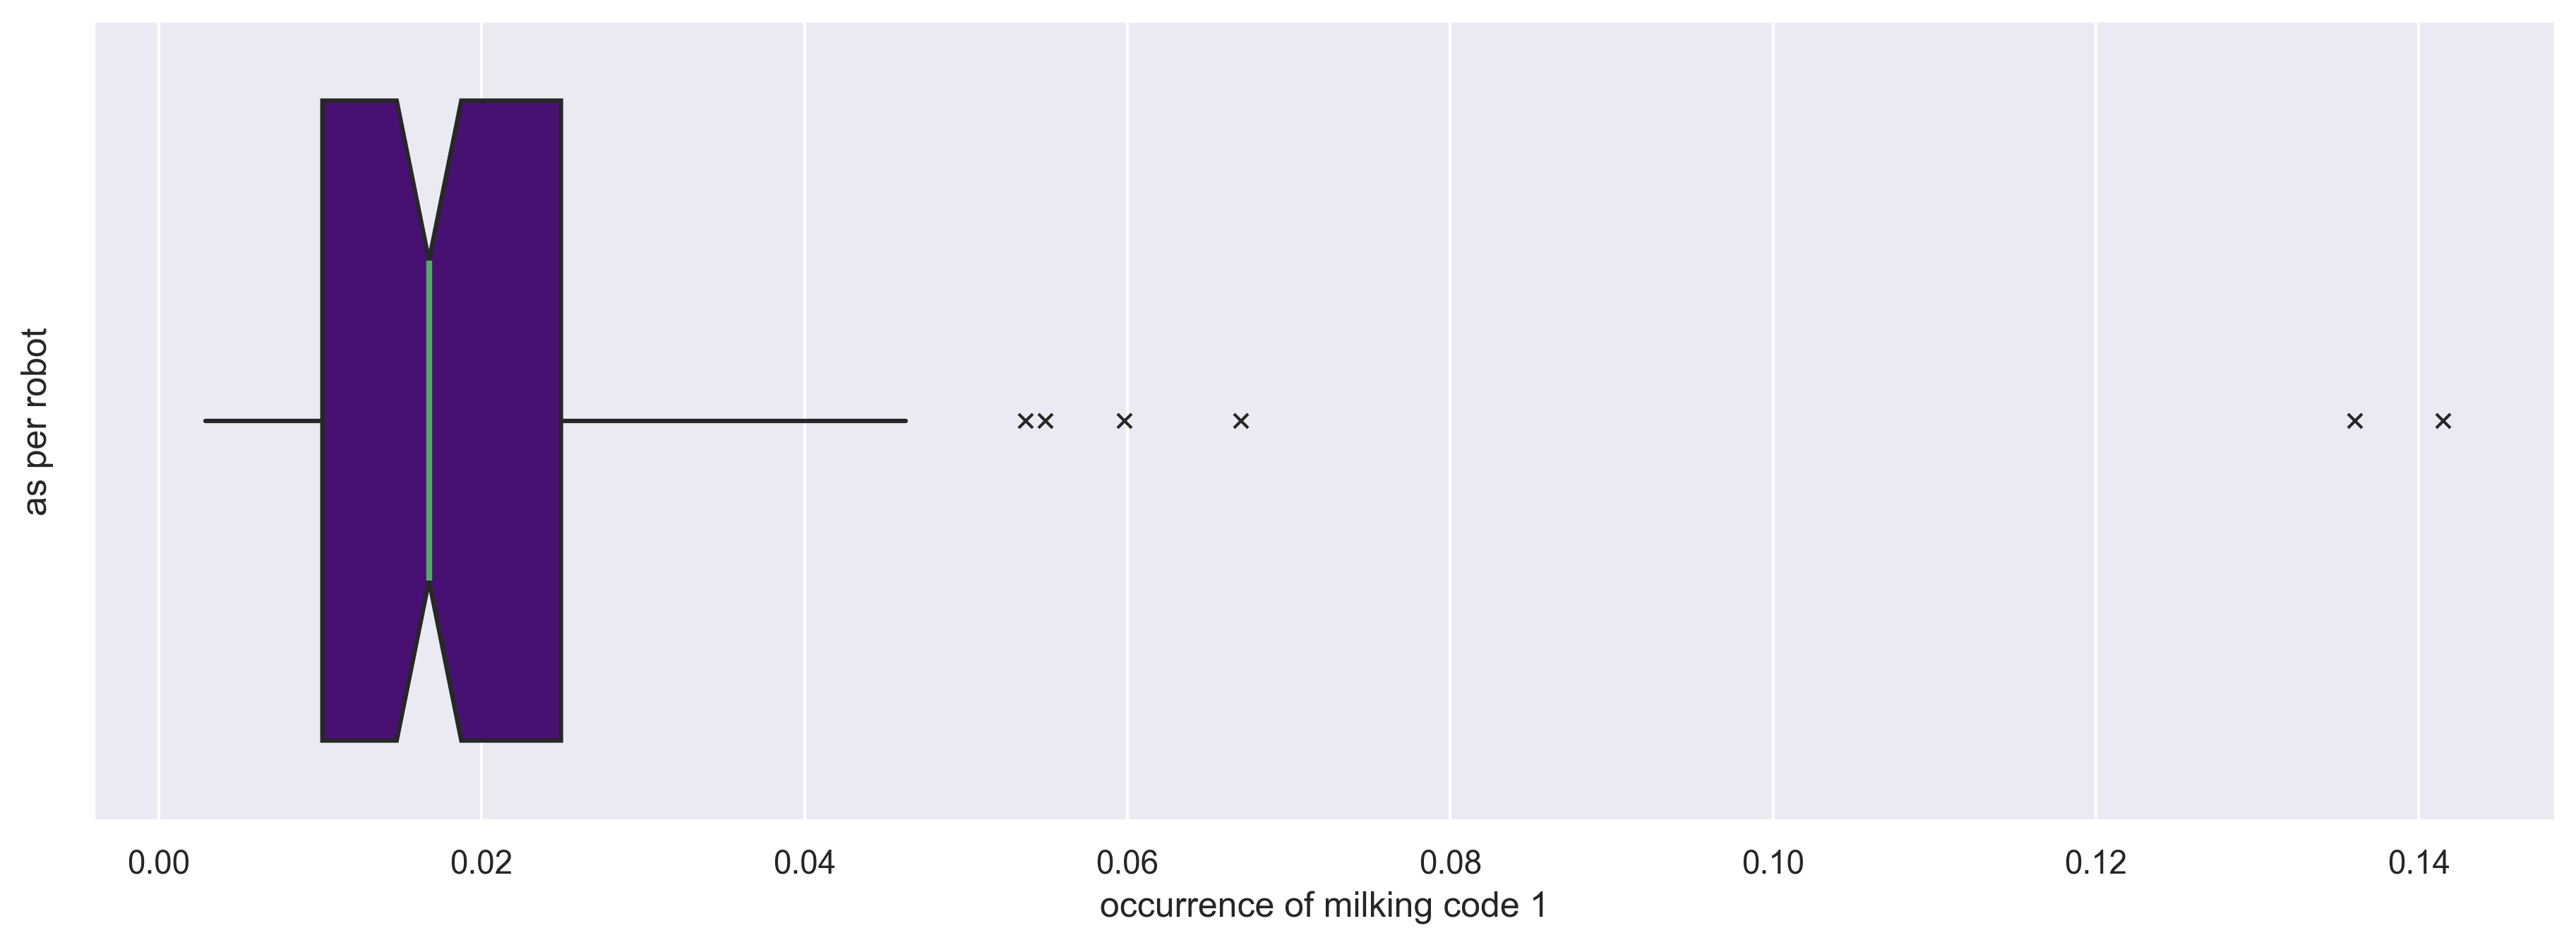

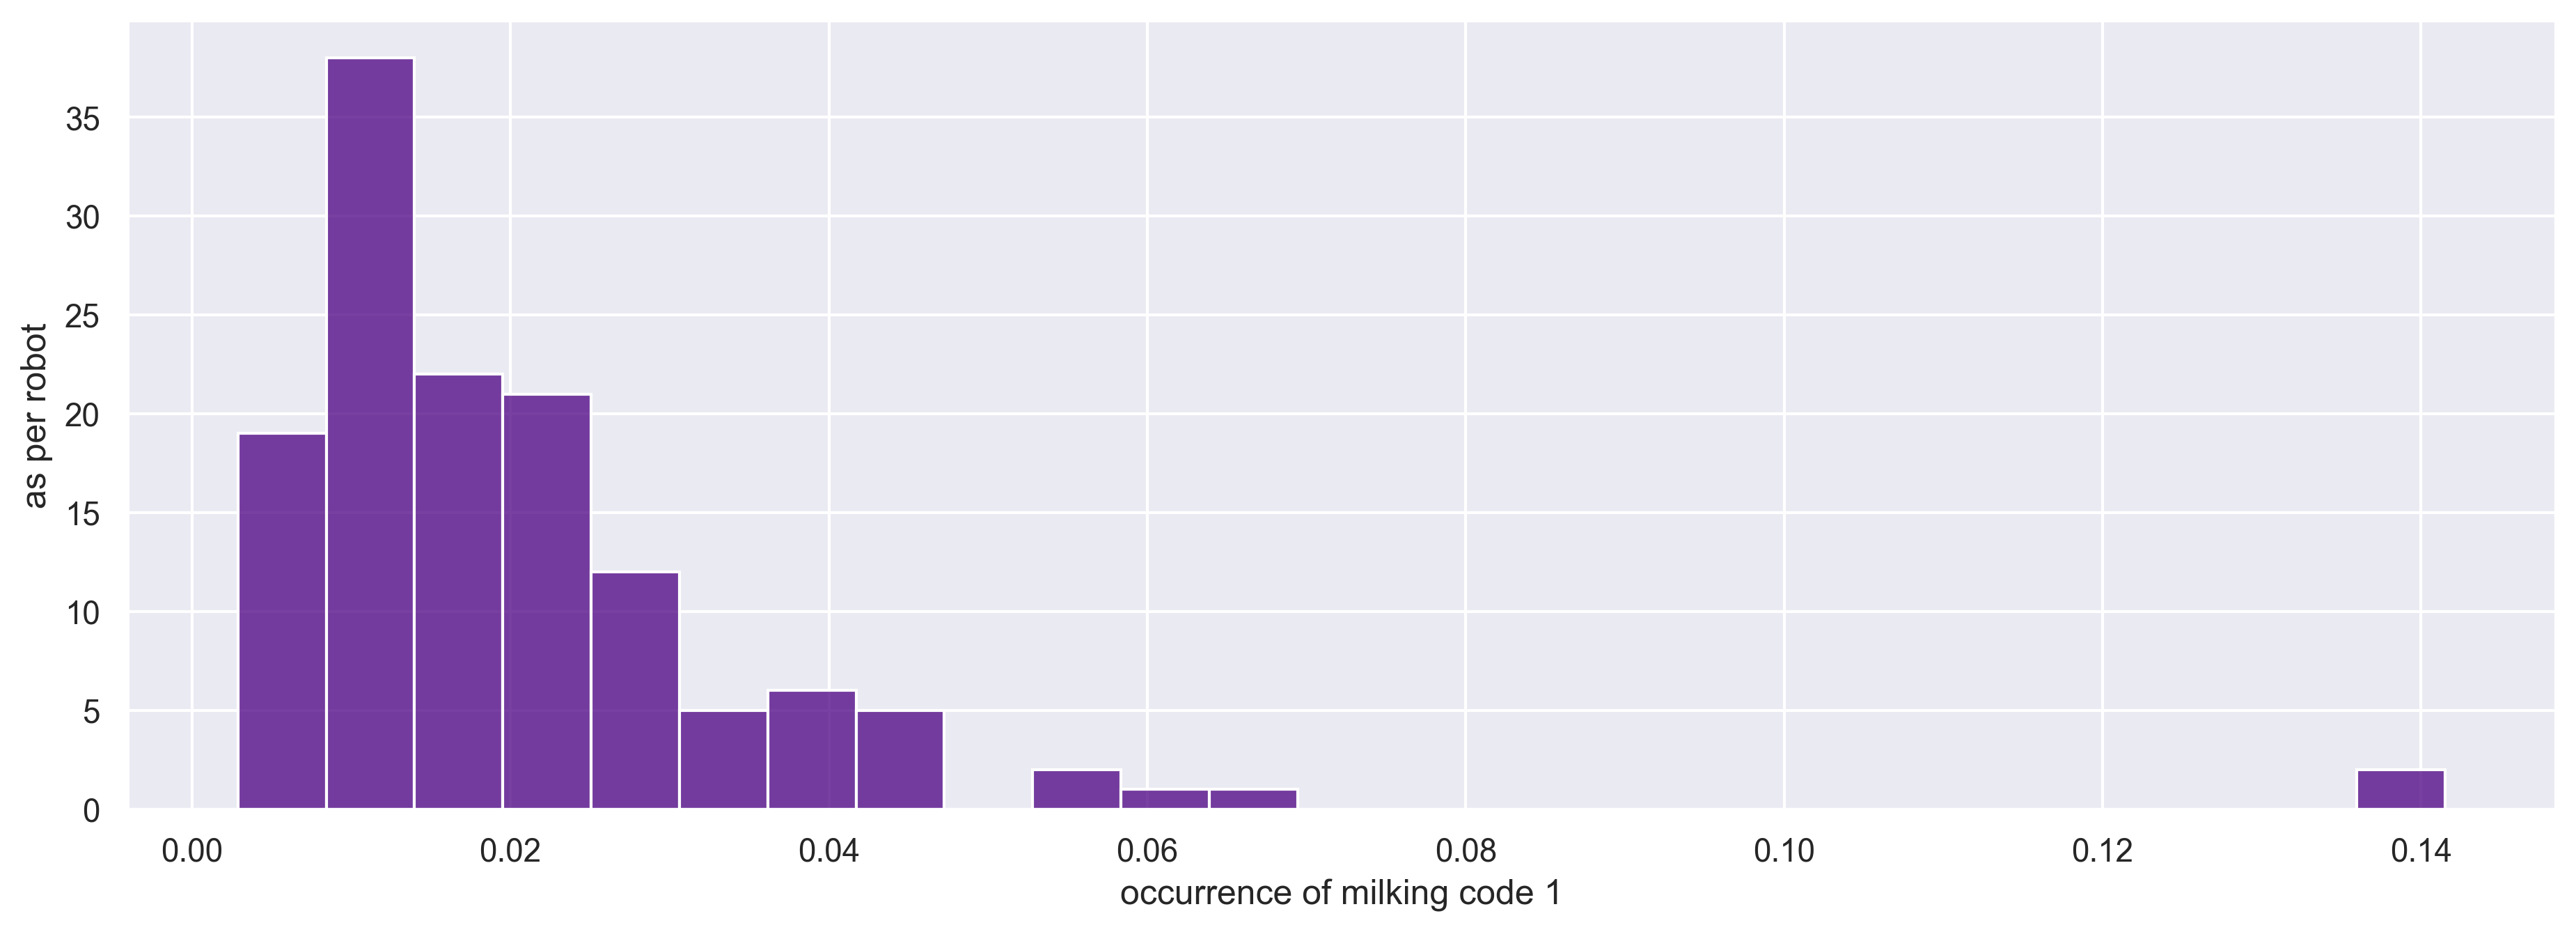

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme and figure size
sns.set_theme(rc={'figure.figsize': (15, 5)})

# Set DPI for the boxplot figure
plt.figure(dpi=300)

# Boxplot
sns.boxplot(occ_robot, 
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            medianprops={"color": "g", "linewidth": 2},
            color="indigo").set(xlabel="occurrence of milking code 1", ylabel="as per robot")

# Display the boxplot
plt.show()

# Set DPI for the histogram figure
plt.figure(dpi=300)

# Histogram
sns.histplot(occ_robot, color="indigo").set(xlabel="occurrence of milking code 1", ylabel="as per robot")

# Display the histogram
plt.show()


In [15]:
print("find these two robots")
top2 = sorted(occ_robot)[-6:]
print("top2: ", top2)
# loop to find robot id
# init robot0_ls
robot0_ls = []
for i in range(len(occ_robot)):  
    if occ_robot[i] in top2: 
        print("id: ", robot_id[i])
        robot0_ls.append(robot_id[i])

find these two robots
top2:  [0.05372533359954743, 0.054914881933003847, 0.059810554803788905, 0.06704279181927793, 0.13602941176470587, 0.14152334152334153]
id:  101037.0
id:  101038.0
id:  102026.0
id:  102044.0
id:  104018.0
id:  104044.0


In [23]:

df_robot1 = dfraw[dfraw['herd_robot'].isin(robot0_ls)]
df_robot0 = dfraw[~dfraw['herd_robot'].isin(robot0_ls)]

In [24]:
df_robot1.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,Unnamed: 0.1,Unnamed: 0,hrd_ida,anm_ida,lact_no,dim,stall_no,milkng_code,mk_wgt,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,milk_time,prep_time,milk_flow_avg,milk_flow_max,ft_pcnt,pt_pcnt,scc,milkng_temp,herd_cow,herd_robot
count,119544.000,119544.000,119544.000,119544.000,119544.000,119544.000,119544.000,119544.000,119544.000,119544.000,119534.000,119534.000,119534.000,119534.000,119534.000,119534.000,117973.000,119534.000,119544.000,119544.000,28417.000,119236.000,119544.000,119544.000
mean,1209321.714,1209321.714,33.457,4149.567,1.933,192.540,102.669,0.061,11.277,6.536,3.148,2.601,2.486,3.084,3.687,2.849,3.493,4.754,3.948,3.175,280.259,38.277,4149599.985,102702.056
std,537169.014,537169.014,12.151,2229.378,1.249,135.554,1.087,0.239,4.463,2.101,1.920,1.528,1.547,1.834,2.037,0.926,1.761,1.585,1.149,0.637,577.742,4.026,2229378.439,1076.742
min,384461.000,384461.000,18.000,55.000,1.000,1.000,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033,0.000,0.000,0.000,0.000,1.000,0.000,55044.000,101037.000
25%,546430.750,546430.750,18.000,2233.000,1.000,90.000,102.000,0.000,8.900,5.183,1.987,1.633,1.550,2.017,2.433,2.383,2.500,3.700,3.427,3.122,28.000,38.300,2233018.000,102044.000
50%,1581888.500,1581888.500,44.000,4141.000,1.000,174.000,102.000,0.000,10.800,6.117,2.817,2.350,2.300,2.800,3.283,2.600,3.300,4.700,3.990,3.268,70.000,38.800,4141044.000,102044.000
75%,1656632.250,1656632.250,44.000,5969.000,3.000,262.000,104.000,0.000,13.400,7.283,3.950,3.317,3.217,3.800,4.450,2.983,4.200,5.500,4.612,3.423,167.000,39.100,5969044.000,104018.000
max,1739510.000,1739510.000,44.000,7977.000,8.000,1393.000,104.000,1.000,49.800,66.933,20.000,13.800,14.417,20.000,20.000,65.067,150.000,12.700,12.748,5.190,4776.000,44.000,7977044.000,104044.000


In [25]:
df_robot0.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,Unnamed: 0.1,Unnamed: 0,hrd_ida,anm_ida,lact_no,dim,stall_no,milkng_code,mk_wgt,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,milk_time,prep_time,milk_flow_avg,milk_flow_max,ft_pcnt,pt_pcnt,scc,milkng_temp,herd_cow,herd_robot
count,3091412.000,3091412.000,3091412.000,3091412.000,3091412.000,3091412.000,3091412.000,3091412.000,3091412.000,3091412.000,3090858.000,3090858.000,3090858.000,3090858.000,3090858.000,3090858.000,3071412.000,3090858.000,3091412.000,3091412.000,922598.000,3086036.000,3091412.000,3091412.000
mean,1620796.729,1620796.729,25.028,3990.521,2.469,156.118,102.147,0.019,12.569,6.947,3.755,3.098,3.101,3.716,4.337,2.610,3.201,4.383,4.005,3.256,273.570,38.523,3990545.536,102172.449
std,935387.492,935387.492,15.739,2306.736,1.505,114.776,1.749,0.136,4.131,2.099,1.871,1.588,1.568,1.867,1.965,0.869,1.290,1.437,1.051,0.528,535.969,2.740,2306736.263,1750.406
min,0.000,0.000,0.000,0.000,1.000,1.000,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-8.433,0.000,0.000,0.000,0.000,1.000,0.000,8.000,101000.000
25%,816809.750,816809.750,11.000,1986.000,1.000,67.000,101.000,0.000,10.000,5.533,2.550,2.100,2.117,2.533,3.017,2.183,2.400,3.400,3.505,3.151,39.000,38.300,1986044.000,101028.000
50%,1617123.500,1617123.500,25.000,3970.000,2.000,140.000,102.000,0.000,12.100,6.533,3.433,2.833,2.850,3.400,3.950,2.450,3.100,4.200,4.039,3.307,76.000,38.700,3970035.000,102010.000
75%,2438102.250,2438102.250,40.000,5988.000,3.000,226.000,102.000,0.000,14.700,7.900,4.633,3.817,3.850,4.567,5.233,2.800,3.800,5.200,4.583,3.462,200.000,39.100,5988018.000,102050.000
max,3210955.000,3210955.000,51.000,8013.000,11.000,1391.000,112.000,1.000,54.400,118.400,22.000,20.933,20.817,22.000,22.000,115.933,276.000,12.700,14.340,6.578,10552.000,58.600,8013002.000,112033.000


### Compute the perference of robots for each cow and plot

In [49]:
""" 
func: 
    to plot the counts and the freqs of robot perferences for each cow 
args: 
    df_herds: panda dataset 
return: 
    two plots
"""
def plot_cow_robot_perfer(df_herd, PLOT=False):
    ## preperation
    # get the cow id 
    cow_id = df_herd['herd_cow'].unique().tolist() 
    # get the robot id 
    robot_id = sorted(df_herd['herd_robot'].unique().tolist())
    # init a result list to storge lists 
    result_ls = [] 
    result_count = []

    ## first count for in the whole herd, freq use of robot
    # init count for all
    count_all = []
    # loop the robot id 
    for robot in robot_id: 
        count_all.append(df_herd[df_herd['herd_robot'] == robot].shape[0])
    # transfer count to proportion 
    SUM = sum(count_all) 
    # get ratio 
    freq_all = [round(each/SUM, 4) for each in count_all]
    # insert name of this row
    freq_all.insert(0, "All cows")
    # append
    result_ls.append(freq_all)

    ## loop the cow id 
    for idx in cow_id: 
        # get cow data
        df_cow = df_herd[df_herd['herd_cow'] == idx]
        # init count for each cow
        count_each_cow = []
        # loop the robot id 
        for robot in robot_id: 
            count_each_cow.append(df_cow[df_cow['herd_robot'] == robot].shape[0])
        # transfer count to proportion 
        SUM = sum(count_each_cow) 
        freq_ls = [round(each/SUM, 4) for each in count_each_cow]
        # append id 
        freq_ls.insert(0, str(idx))
        count_each_cow.insert(0, str(idx))
        # append 
        result_ls.append(freq_ls)
        result_count.append(count_each_cow)

    ## build the df_freq for plotting 
    # change type 
    robot_idx = ["robot id: "+str(int(i)) for i in robot_id]
    df_count = pd.DataFrame(result_count, columns = ["cow id"] + robot_idx)
    df_freq = pd.DataFrame(result_ls, columns = ["cow id"] + robot_idx)

    ## if plot 
    if PLOT:
        %matplotlib inline
        fig = plt.figure(dpi=150)
    
        # plot 1
        ax1 = fig.add_subplot(121)
        ax1.xaxis.set_visible(False)
        ax1.set_facecolor("white")
        df_count.plot(x='cow id', kind='bar', stacked=True,
                title='Counts of robot perferences for each cow', figsize=(15, 10), ax=ax1)

        # plot 2
        ax2 = fig.add_subplot(122)
        ax2.xaxis.set_visible(False)
        ax2.set_facecolor("white")
        df_freq.plot(x='cow id', kind='bar', stacked=True,
                title='Proportion of robot perferences for each cow', figsize=(15, 10), ax=ax2)
        plt.xlabel("cow id")
        plt.show()
    
    # return the freq of each herd 
    return freq_all[1:]

In [50]:
""" 
func: 
    give the freq of visit for each cow
args: 
    df_herd: panda herd data 
return: 
    list[float]
"""
def boxplot_robot_perfer(df_herd):
    ## preperation
    # get the cow id 
    cow_id = df_herd['herd_cow'].unique().tolist() 
    # get the robot id 
    robot_id = sorted(df_herd['herd_robot'].unique().tolist())
    # init a result list to storge lists 
    result_ls = [] 

    ## loop the cow id 
    for idx in cow_id: 
        # get cow data
        df_cow = df_herd[df_herd['herd_cow'] == idx]
        # init count for each cow
        count_each_cow = []
        # loop the robot id 
        for robot in robot_id: 
            count_each_cow.append(df_cow[df_cow['herd_robot'] == robot].shape[0])
        # transfer count to proportion 
        SUM = sum(count_each_cow) 
        freq_ls = [round(each/SUM, 4) for each in count_each_cow if each != 0]

        # append 
        result_ls += freq_ls

    return result_ls

""" 
func: 
    plot df base on column name 
args: 
    df: panda 
return: 
    plots
"""
def plot_box(df, check_column): 

    # create the figure and two subplots
    fig, axes = plt.subplots(ncols=len(check_column), figsize=(25, 20))

    # create the boxplot with Seaborn
    for column, axis in zip(check_column, axes):
        #print("axis: ", axis)
        #print(column)
        # using sns
        sns.boxplot(data=df[column].tolist(), ax=axis, color="indigo") 
        # set name
        axis.set_title(column)
        #axis.set(xticklabels=[], xticks=[], ylabel=column)

    # show the plot
    plt.tight_layout()
    plt.show()

In [99]:
# init a new df 
ls_ls_freq = []
# get herd id 
herd_id_ls = sorted(dfraw['hrd_ida'].unique().tolist())

# loop herd and use func
for herd_id in herd_id_ls: 
    # get herd data
    df_herd = dfraw[dfraw['hrd_ida'] == herd_id]
    """using func: boxplot_robot_perfer(df_herd)"""
    ls_freq = boxplot_robot_perfer(df_herd)
    # append
    ls_ls_freq.append(ls_freq)

In [101]:
# ls_ls_freq[0]

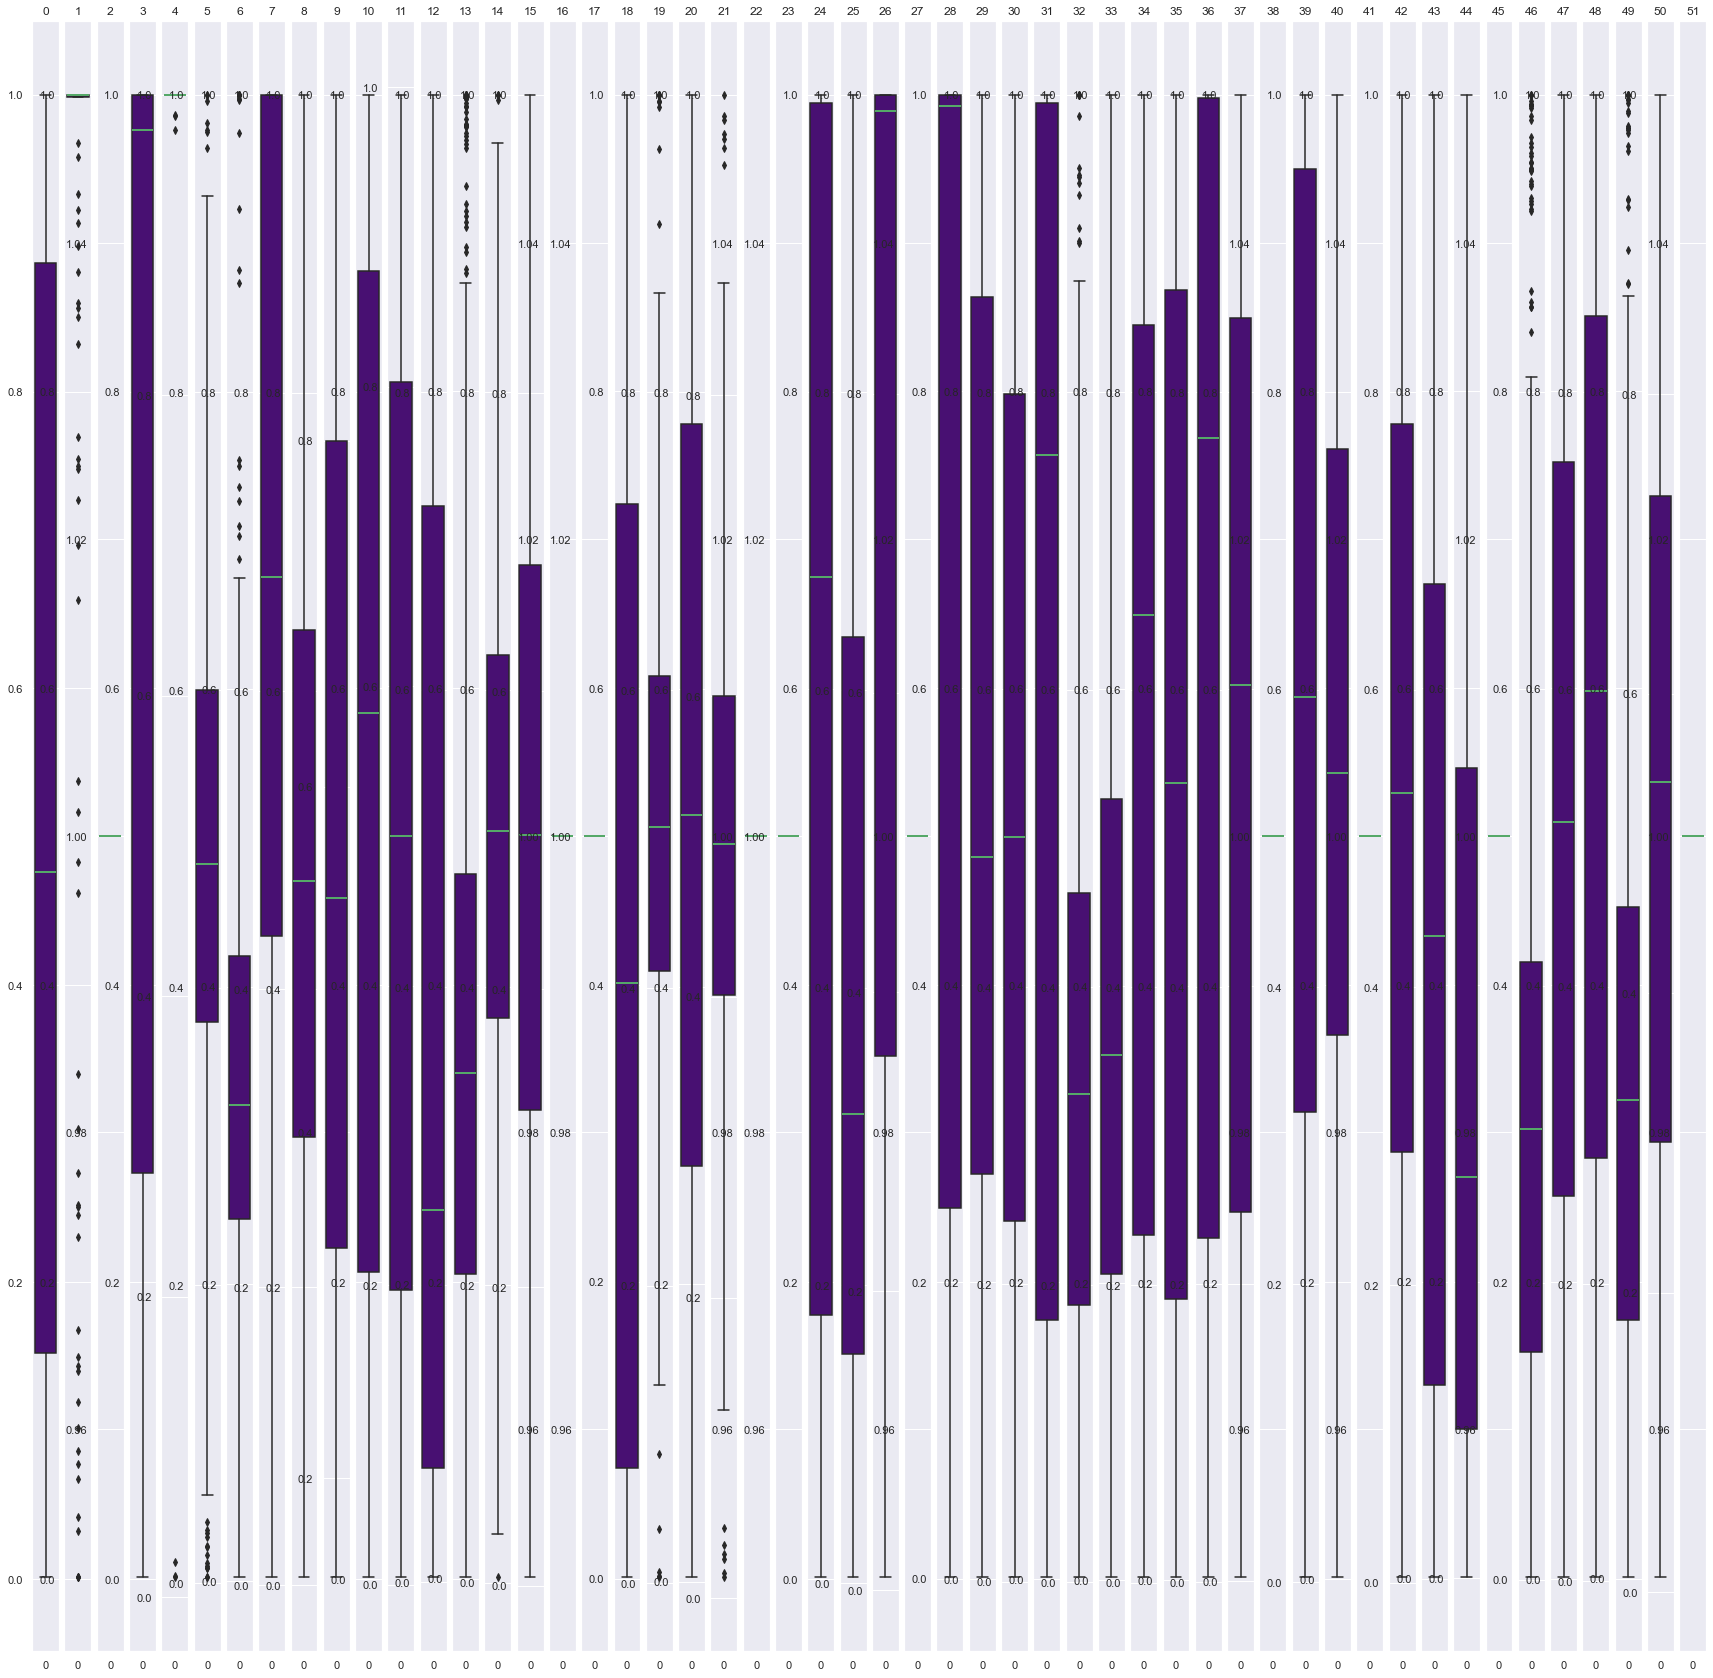

In [114]:
# create the figure and two subplots
fig, axes = plt.subplots(ncols=len(herd_id_ls), figsize=(30, 30))

# create the boxplot with Seaborn
for idx in range(len(axes)):
    # using sns
    sns.boxplot(data=ls_ls_freq[idx], ax=axes[idx], medianprops={"color": "g", "linewidth": 2}, color="indigo") 
    # set name
    axes[idx].set_title(str(herd_id_ls[idx]))
    #axis.set(xticklabels=[], xticks=[], ylabel=column)

# show the plot
plt.show()

# Visiting number per herds

In [51]:

# get herd id 
herd_id_ls = sorted(dfraw['hrd_ida'].unique().tolist())
# init 
freq_all_ls = []
# loop herd and use func
for herd_id in herd_id_ls: 
    # get herd data
    df_herd = dfraw[dfraw['hrd_ida'] == herd_id]
    # print
    # print("animals: ", df_herd['anm_ida'].nunique(), "| stalls: ", df_herd['stall_no'].nunique())
    """using func: """
    freq_all = plot_cow_robot_perfer(df_herd)
    # append
    freq_all_ls.append(freq_all)

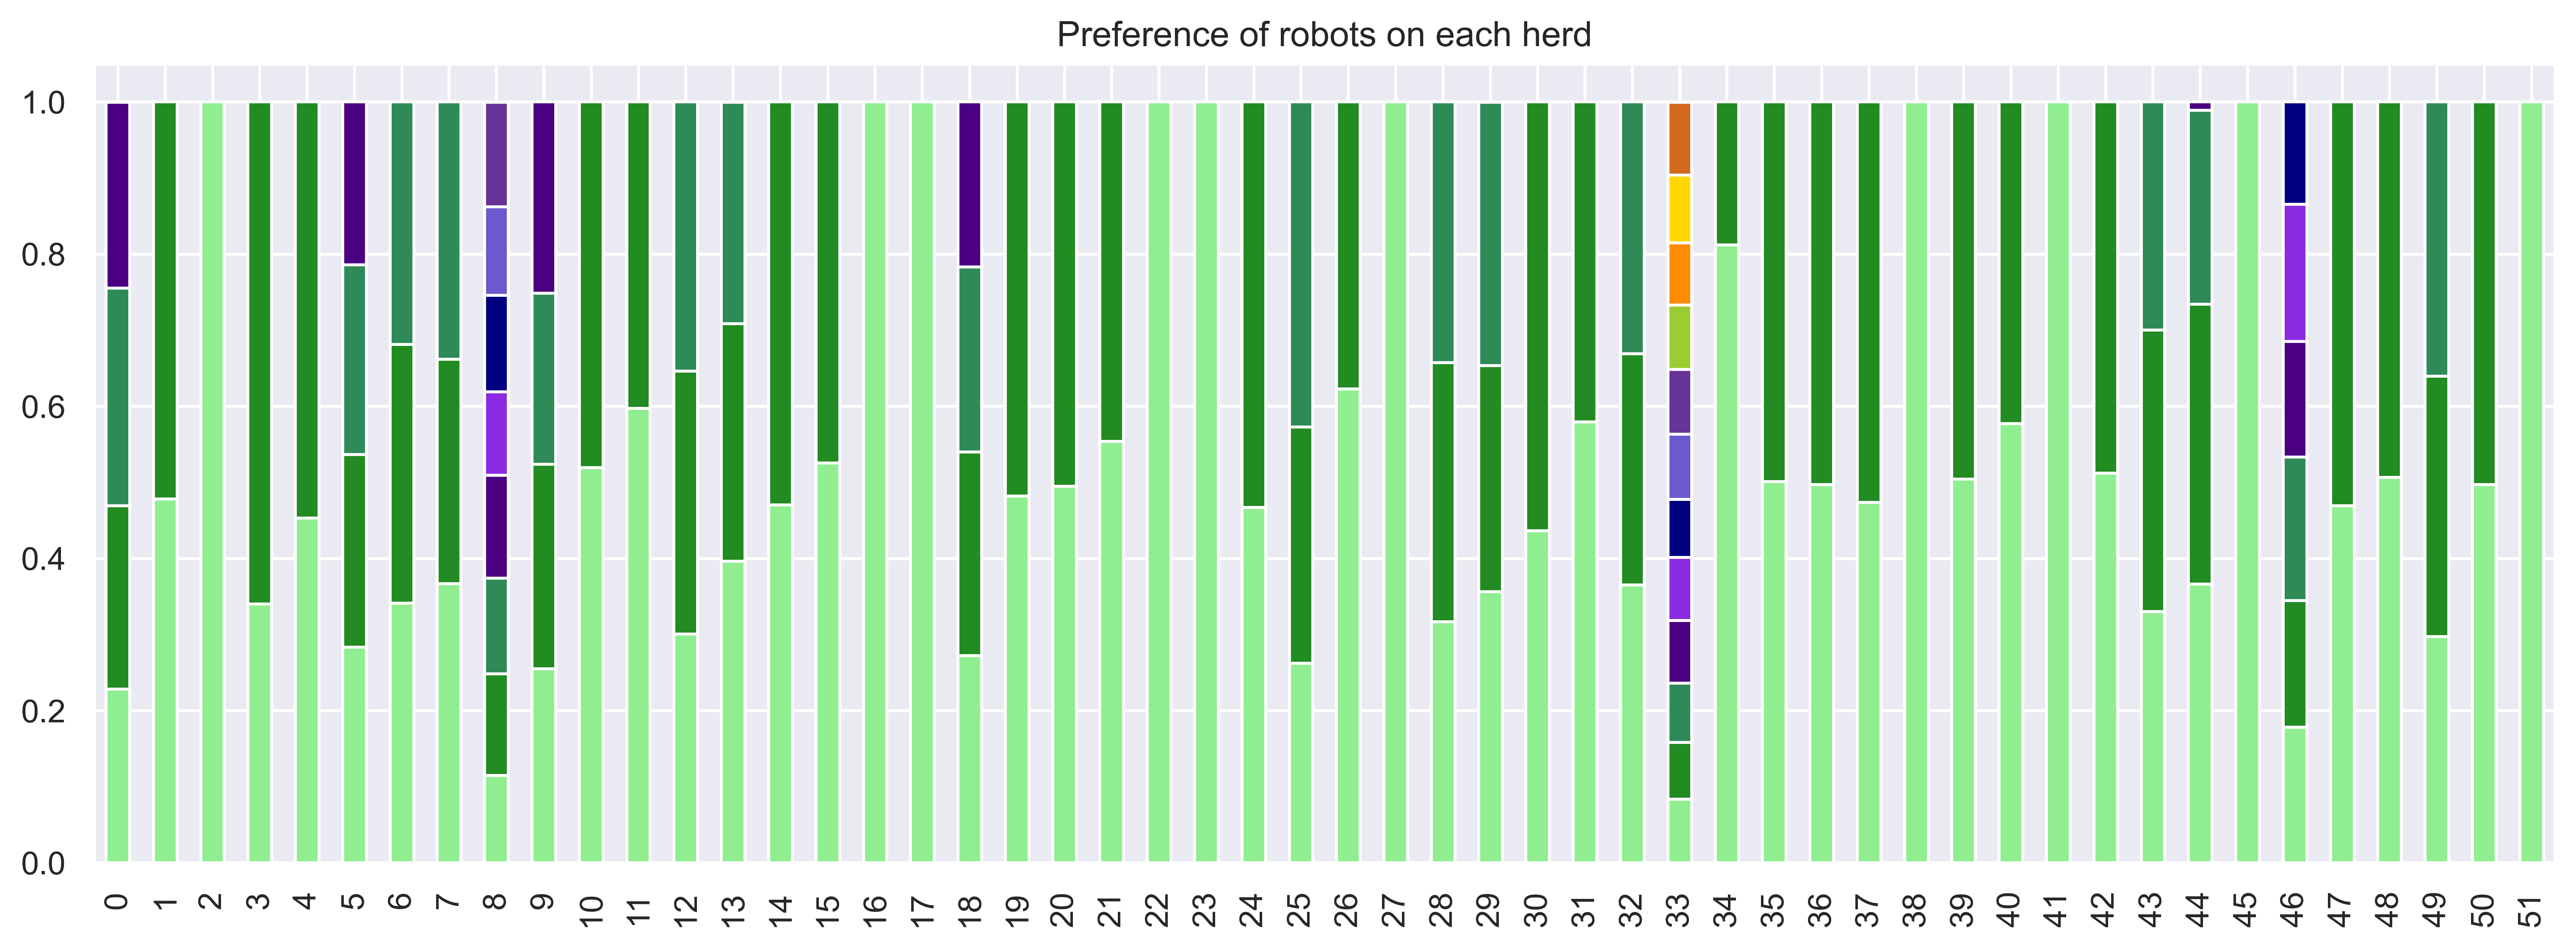

In [58]:
# pad all nested list into the same length
max_len = max([len(i) for i in freq_all_ls])
pad_ls = [i + [0] * (max_len - len(i)) for i in freq_all_ls]

import matplotlib.pyplot as plt
import pandas as pd

# Build df for plot
df_all_count = pd.DataFrame(pad_ls)

# Set DPI for the bar plot figure
fig, ax = plt.subplots(dpi=500)

# Bar plot
color_ls = ['lightgreen', 'forestgreen', 'seagreen', 'indigo', 'blueviolet', 'navy', 'slateblue', 'rebeccapurple', 'yellowgreen', 'darkorange', 'gold', 'chocolate']
df_all_count.plot(kind='bar', color=color_ls, stacked=True, title='Preference of robots on each herd', ax=ax, legend=False)

# Display the plot
plt.show()



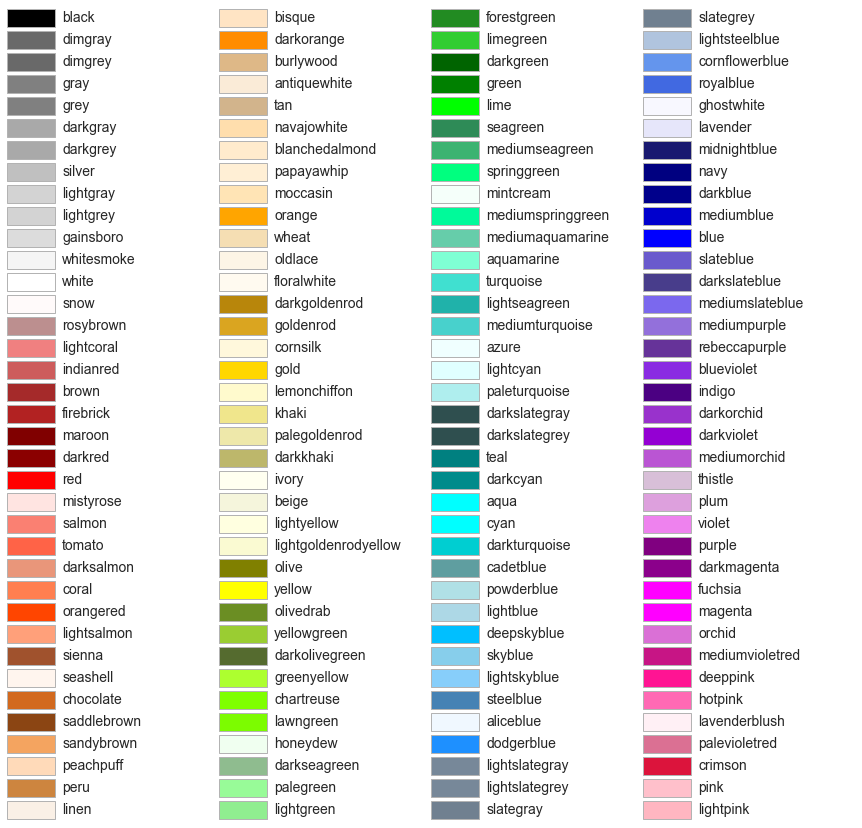

In [32]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()